  ### FAKE NEWS DETECTION USING POLITIFACT AND SNOPES DATA
  Vinothini Aravindan
  Aashish Karki
  Shaima Freja
  Yeganeh Hallaj

## Fake News Detection
Goal: The project aims at exploring the various machine learning techniques for detection and analysis of fake news from Real news. We are comparing several classifying techniques to find out the best model that could be used to detect false news.

### Steps for detecting fake news:

1. Data Collection: 
    Import the necessary libraries. We have two dataset saved as json files the first file contains data from politifact website and the secand file contains data from snopes website. The two dataset consist of multiclassification label. 
    - Politifact data contains the following columns: 'claim', 'doc', 'label', 'factchecker', 'published', 'speaker',
       'date_stated', 'stated_in', 'url', 'topic', 'sources', 'summary'
    - Snopes data contains the following columns: 'label', 'claim', 'doc', 'factchecker', 'published', 'url', 'topic',
       'sources', 'extra_description'
    
2. Exploring and Data visualization:
     - printing column name of each data sets and choosing most common columns like label,claim and doc.
     - merging two datasets into one data and finding the unique label using thresold function.
     - dataset of label field contains different attibutes like 'false', 'barely-true', 'half-true', 'mostly-true', 'pants-fire', 'true'.
     - We need to figureout the news is fake or real. So by replacing 'barely-true','pants-fire' and 'half-true' as 'false' as well as 'mostly-true' as 'true' for binary classification
     - both 'claim' and 'doc' column contains text, so merging those columns as 'text' field for better way
     - representing the binary values for label field '0 for false' and '1 for true'
     
3. Preprocessing & Cleaning dataset: 
    The dataset has to be preprocessed so that the machine learning algorithm can detect patterns easily. 
    By using the 'nltk' libraries to removing the following  functionalities to get exact information from the text.
    - Removal of Punctuation Marks and Special Characters
    - Removal of Stopwords.
             - Which is mainly used to connect words or to declare the tense of a sentences also it doesnt provide exact meaning of text
    - Lemmatization
             -Convert the word or token in its Base form.
4. Splitting the data into training and Testing parts. 
 
5. Feature extraction & Classification Models.
    - To prepare the text dataset and make it ready for training into machine learning model we should convert text into numbers (vertorization). There are many Feature extraction techniques we use TF-IDF bagofwords & pre-trainded word Embedding GloVe.
    - Apply simple Machine learning Model and check the accuracy.
    - Apply Deep Neural Network Classifier (LSTM, Bert) and make display all visualization using tensorboard.

6. Evaluating the models and Comparing between classifier models.


### Resources:
1. https://medium.com/swlh/fake-news-detection-using-machine-learning-69ff9050351f
2. https://researchtrend.net/ijet/pdf/A%20Comparison%20of%20Machine%20Learning%20Algorithms%20in%20Fake%20News%20Detection%20LOKESHKUMAR%20R.pdf
3. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
4. https://www.tensorflow.org/text/guide/word_embeddings
5. https://www.tensorflow.org/guide/keras/train_and_evaluate
6. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
7. https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
8. https://stavanger.instructure.com/courses/10010/files/1096892?module_item_id=179592
9. https://medium.com/analytics-vidhya/fake-news-detector-cbc47b085d4
10. https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/
11. https://www.machinelearningplus.com/nlp/gensim-tutorial/
12. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ 
13. https://towardsdatascience.com/fake-news-classification-with-bert-afbeee601f41
14. https://www.analyticsvidhya.com/blog/2022/03/fake-news-classification-using-deep-learning/#h2_8 








### 1. Data Collection: 
- Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [4]:
# from google.colab import drive 
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# cd "/content/drive/MyDrive/Colab Notebooks/DAT 550 - 22 Project"

/content/drive/MyDrive/Colab Notebooks/DAT 550 - 22 Project


In [7]:
# !ls

'DAT 550 - Group6 - FakeNews Detection.ipynb'   politifact.json   snopes.json


#### Import the Dataset from two json files

In [8]:
politifact = pd.read_json('data/politifact.json')
snopes = pd.read_json('data/snopes.json')

### 2. Exploring and Data visualization

In [9]:
print("politiData columns",politifact.columns)
politifact.head()


politiData columns Index(['claim', 'doc', 'label', 'factchecker', 'published', 'speaker',
       'date_stated', 'stated_in', 'url', 'topic', 'sources', 'summary'],
      dtype='object')


,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,2019-6-6,Viral image,2019-6-28,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",None
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,2019-6-12,Conservative Daily Post,2019-6-10,a post,https://www.politifact.com/factchecks/2019/jun...,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",None
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,2019-3-29,Facebook posts,2019-3-20,a Facebook post,https://www.politifact.com/factchecks/2019/mar...,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",None


In [10]:
print("SnopsData columns:",snopes.columns)
snopes.head()

SnopsData columns: Index(['label', 'claim', 'doc', 'factchecker', 'published', 'url', 'topic',
       'sources', 'extra_description'],
      dtype='object')


,label,claim,doc,factchecker,published,url,topic,sources,extra_description
0,False,Storing a car battery on a concrete floor will...,Much of what makes a car go remains an arcane ...,Snopes Staff,2011-1-4,https://www.snopes.com/fact-check/battery-park/,"[Automobiles, Techno File]","[{'description': 'Magliozzi, Tom and Ray. “Cli...",None
1,True,U.S. President Donald Trump tapped World Wrest...,"In mid-April 2020, controversy consumed the Tr...",Bethania Palma,2020-4-16,https://www.snopes.com/fact-check/coronavirus-...,"[Politics, COVID-19]","[{'description': 'McGeorge, Alistair.“Donald T...",None
2,True,An image shows a restaurant receipt displaying...,"In May 2020, social media users began sharing ...",David Mikkelson,2020-5-13,https://www.snopes.com/fact-check/covid-surcha...,"[Business, COVID-19]","[{'description': 'Deere, Michael. “Several Wes...",None
3,Outdated,A massive human-made sinkhole opened up in Gua...,"In early October 2019, readers searched the Sn...",Bethania Palma,2019-10-9,https://www.snopes.com/fact-check/guatemala-si...,[Science],"[{'description': 'Than, Ker. “Guatemala Sinkho...",None
4,True,"Police in Crawford County, Georgia forced loca...","In December 2017, disturbing reports surfaceed...",Dan MacGuill,2017-12-7,https://www.snopes.com/fact-check/georgia-poli...,"[Critter Country, animal cruelty, animals, cra...","[{'description': 'Shaw, Mary Grace; Plaskowsky...",None


- 2.1 Feature selection

In [11]:
snopes_filtered = snopes[['claim', 'doc', 'label']].copy()
politifact_filtered = politifact[['claim', 'doc', 'label']].copy()

In [12]:
labelforSnopesDB = snopes_filtered.label.unique()
labelforSnopesDB

array(['False', 'True', 'Outdated', 'Mostly False', 'Correct Attribution',
       'Unproven', 'Mixture', 'Scam', 'Miscaptioned', 'Legend',
       'Misattributed', 'Labeled Satire', 'Lost Legend', 'Mostly True',
       'Research In Progress'], dtype=object)

In [13]:
labelforPolitiDB = politifact_filtered.label.unique()
labelforPolitiDB

array(['false', 'barely-true', 'half-true', 'mostly-true', 'pants-fire',
       'true', 'full-flop', 'half-flip', 'no-flip'], dtype=object)

- A check is implemented to be sure no NULL (NaN) values are present in the dataset, as follows.

In [14]:
print('Count of null values in snopes data ', snopes_filtered.isnull().sum())
print('-'*100)
print('Count of null values politifact data ',politifact_filtered.isnull().sum())

Count of null values in snopes data  claim    0
doc      0
label    0
dtype: int64
----------------------------------------------------------------------------------------------------
Count of null values politifact data  claim    0
doc      0
label    0
dtype: int64


- Both data have not any null values in the candidate features

In [15]:
politifact_filtered.shape

(18379, 3)

In [16]:
snopes_filtered.shape

(3919, 3)

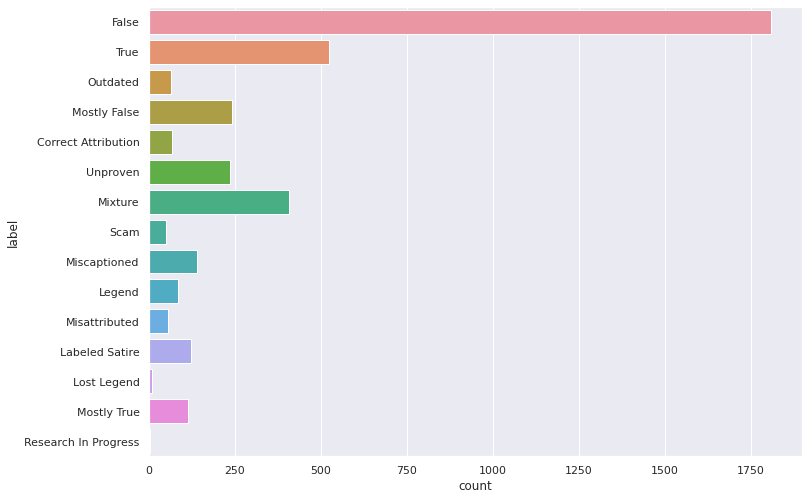

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y ='label', data = snopes_filtered)

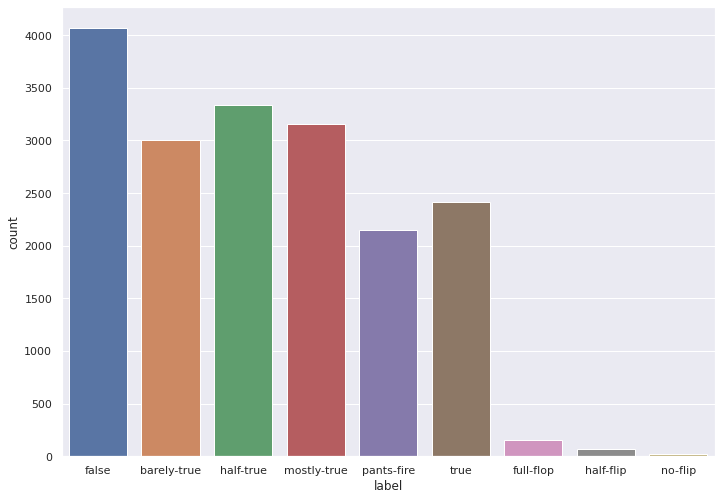

In [18]:
sns.countplot(x ='label', data = politifact_filtered)

#### 2.1 Works on two dataset separatly and implement the machine learning models on each dataset.
- Convert multicalssification labels to binary classification label(true, false) for each dataset
- Drop rows that have less affect on the data and could not be classified as(true or false)
- ConvertToBinaryClassification: This function Convert from multicalssification labels to binary classification label(true, false) , it takes one argument the data that we want to make convert on

In [19]:
# Remove unwanted rows from both dataset
delValues = ['Lost Legend','Research In Progress', 'Miscaptioned','Misattributed','Legend', 'full-flop', 'half-flip', 'no-flip', 'Outdated', 'Unproven', 'Mixture', 'Scam', 'Labeled Satire']

snopes_filtered = snopes_filtered[snopes_filtered.label.isin(delValues) == False]
print('labels for snopes:',snopes_filtered.label.unique())

politifact_filtered = politifact_filtered[politifact_filtered.label.isin(delValues) == False]
print('labels for  politifact:', politifact_filtered.label.unique())
#snopes_filtered

labels for snopes: ['False' 'True' 'Mostly False' 'Correct Attribution' 'Mostly True']
labels for  politifact: ['false' 'barely-true' 'half-true' 'mostly-true' 'pants-fire' 'true']


In [20]:
def ConvertToBinaryClassification(data, Datalabels, Dataname):  

    FalseLable = ['False', 'false',  'Mostly False',  'pants-fire']

    TrueLable = ['True', 'true', 'Correct Attribution', 'Mostly True', 'mostly-true', 'half-true', 'barely-true' ]
    
    for label in Datalabels:
        if label in FalseLable:
            data.replace(label, 'false', inplace=True)
        if label in TrueLable:
            data.replace(label, 'true', inplace=True)
    print('Convert to Binary classification for ',Dataname)

In [21]:
# Take a copy for both dataset and convert labels from multi classification to binary classification
Bin_snopesDB = snopes_filtered.copy()
ConvertToBinaryClassification(Bin_snopesDB, labelforSnopesDB, 'Snops Data')


Bin_politifactDB = politifact_filtered.copy()
ConvertToBinaryClassification(Bin_politifactDB, labelforPolitiDB, 'Politifact Data')

Convert to Binary classification for  Snops Data
Convert to Binary classification for  Politifact Data


In [22]:
# Check values for each lables
def PlotLabelsCount(data, title):
    print('Label Counts for '+title)
    print(data.label.value_counts())
    chart = sns.countplot(x ='label', data = data)
    chart.set_title(title)


Label Counts for Snopes Data
false    2050
true      703
Name: label, dtype: int64
----------------------------------------------------------------------------------------------------


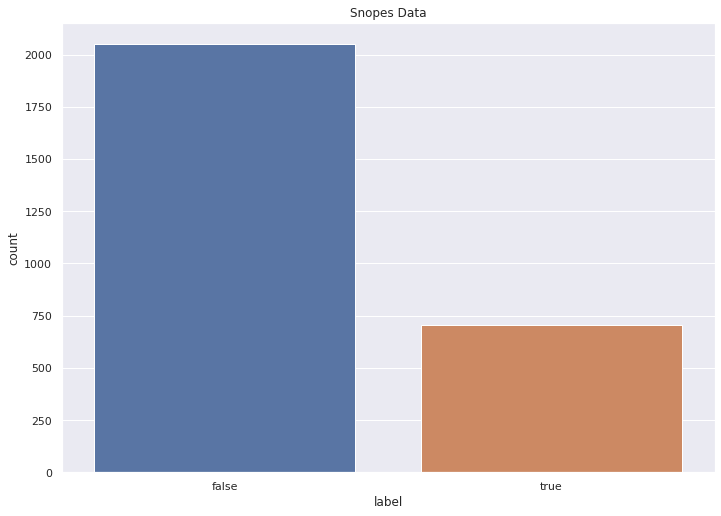

In [23]:
PlotLabelsCount(Bin_snopesDB, 'Snopes Data')
print('-'*100)


- We noticed that the snopes data Labels are unbalanced False counts is greater than true, which can lead to low accuracy. we can later merge two dataset

Label Counts for politifact Data
true     11917
false     6217
Name: label, dtype: int64


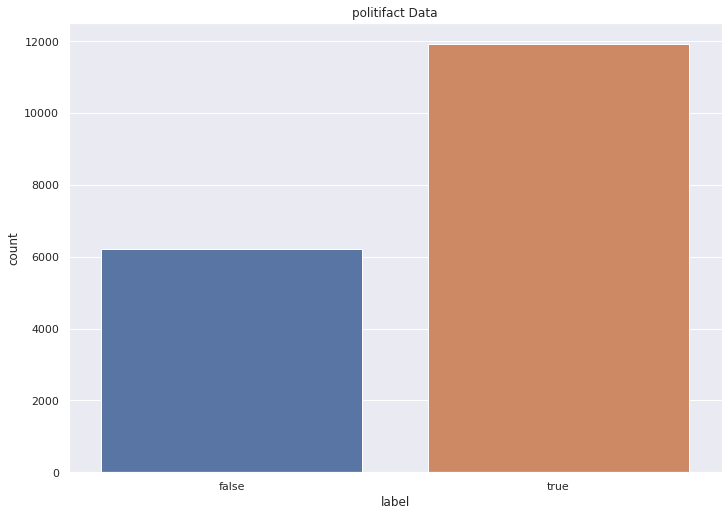

In [24]:
PlotLabelsCount(Bin_politifactDB, 'politifact Data')

  
#### 2.2 Preprocessing on features 
- Create function 'featurePreprocssing' to implement the following processing:
- Convert categorical label to binary(0,1)
- Concatenate Claim with the doc column to simplify processing.

In [25]:
def FeaturePreprocssing(data):
    data['label'].unique()
    label_name = {'true' : 1 , 'false' : 0 }
    data['label'] = data['label'].map(label_name)

    # Concatenate claim + doc add delimiter in between
    data['text'] = data['claim'] + " // " + data['doc']

    # delete the claim and doc feature from the dataset
    del data['claim']
    del data['doc']


In [26]:
# processing for both dataset

FeaturePreprocssing(Bin_snopesDB)
#PlotLabelsCount(Bin_snopesDB, 'Snopes Data')
Bin_snopesDB.head()



,label,text
0,0,Storing a car battery on a concrete floor will...
1,1,U.S. President Donald Trump tapped World Wrest...
2,1,An image shows a restaurant receipt displaying...
4,1,"Police in Crawford County, Georgia forced loca..."
5,0,A new policy implemented in November 2018 bann...


In [27]:
FeaturePreprocssing(Bin_politifactDB)
#PlotLabelsCount(Bin_politifactDB, 'politifact Data')
Bin_politifactDB.head()


,label,text
0,0,There were no American flags at the first Demo...
1,0,"Quotes Thomas Jefferson as saying that ""a gove..."
2,0,Leaving @[4:0] as a Facebook comment can revea...
3,0,"""Disease-ridden"" migrants from parts of Africa..."
4,0,Says Islamic studies professor Tariq Ramadan s...


#### 2.3 Merging Two Dataset snops & politifact to implement preprocessing on one dataset
- we try to merge the two dataset to get one balanced data


In [28]:
## Merging two dataframes
Mergeddata = Bin_politifactDB.merge(Bin_snopesDB, how="outer")
Mergeddata.head()

,label,text
0,0,There were no American flags at the first Demo...
1,0,"Quotes Thomas Jefferson as saying that ""a gove..."
2,0,Leaving @[4:0] as a Facebook comment can revea...
3,0,"""Disease-ridden"" migrants from parts of Africa..."
4,0,Says Islamic studies professor Tariq Ramadan s...


In [29]:
Mergeddata.shape

(20887, 2)

In [30]:

unique_labels = Mergeddata.label.value_counts()
unique_labels

1    12620
0     8267
Name: label, dtype: int64

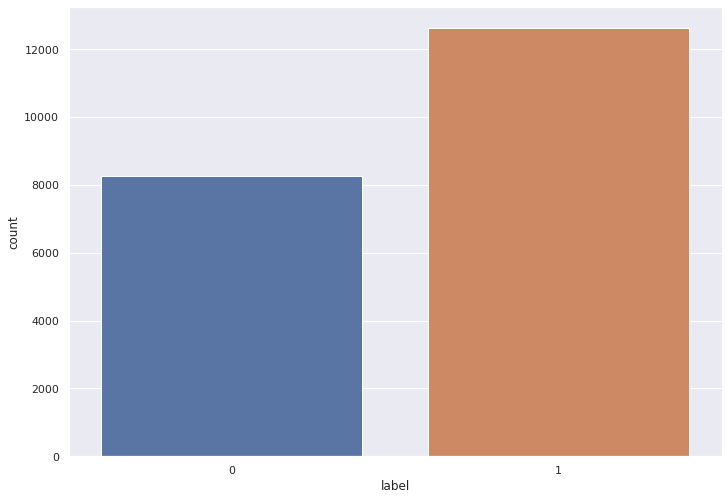

In [31]:
sns.countplot(x ='label', data = Mergeddata)

### 3. Cleaning & preprocessing:
- Remove punctuation, stopwords and make lemmitization to simplify the dataset.
- we create 3 functions: punctuations remove, remove stopwords, and apply lemmitization through stopwordRemoval_lemmetizefunction and preprocessing function which run all these functions on the text.
    - Tokenization (dividing a text into smaller units)
    - Stop words Removal:Words like the and for will be eliminated from our dataset because they take too much room.
    - Lemmatization:It removes the endings of the word to the root word. It reduces the word children to a child.
    - Lemmatization is used to reduce text redundancy by converting words having the same meaning but different inflected forms to their base form and thats helps to create better NLP models that are efficient and also computationally fast.
- Referance: https://machinelearningknowledge.ai/learn-lemmatization-in-ntlk-with-examples/#Stemming_vs_Lemmatization_Example


In [32]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
def punctuations(text):
    text = text.lower()
    punctuations = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    onlychars = re.sub('[^a-z]', ' ', punctuations)
    stripedspaces = re.sub('\s+', ' ', onlychars)
    return stripedspaces

In [34]:
sw = set(stopwords.words('english'))
def stopwordRemoval_lemmetize(text):
    Tokens = word_tokenize(text)
   
    wnl = WordNetLemmatizer()
    filtered = []
    for item in Tokens:
        if item not in sw:         
            filtered.append(wnl.lemmatize(item))
        
    return ' '.join(filtered)

In [35]:
# This function take two arguments the database and the column name
def preprocessing(df, colname, bstopword = True):
    df_process = df.copy()
    df_process[colname] = df_process.apply(lambda item: punctuations(item[colname]), axis=1)  
    if bstopword:
        df_process[colname] = df_process.apply(lambda item: stopwordRemoval_lemmetize(item[colname]), axis=1)        
    df_process = df_process.reset_index(drop = True)
    return df_process

In [36]:
# preprocessing for snops & politifact remove punctuation mark and converting text to lower-case
Bin_snopesDB_P = Bin_snopesDB.copy()
Bin_snopesDB_P = preprocessing(Bin_snopesDB_P, 'text', False)
Bin_politifactDB_P = Bin_politifactDB.copy()
Bin_politifactDB_P = preprocessing(Bin_politifactDB_P, 'text', False)

# preprocessing  remove puctuation mark
Mergeddata_P = Mergeddata.copy()
Mergeddata_P = preprocessing(Mergeddata_P, 'text', False)

- Apply preproessing on both data

In [37]:
# preprocessing for snops & politifact 
#Bin_snopesDB = preprocessing(Bin_snopesDB, 'text', False)
#Bin_politifactDB = preprocessing(Bin_politifactDB, 'text', False)
# remove stop word & stimming 
Bin_snopesDB = preprocessing(Bin_snopesDB, 'text', True)
Bin_politifactDB = preprocessing(Bin_politifactDB, 'text', True)




- Apply preprocessing on Merge data

In [38]:

Mergeddata = preprocessing(Mergeddata, 'text', True)

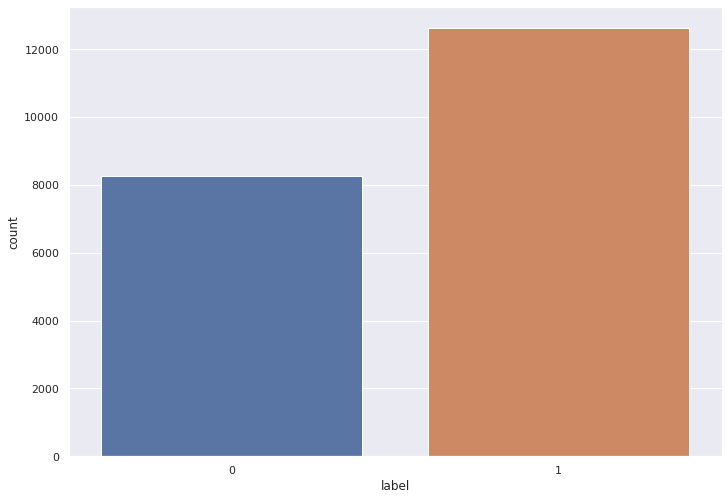

In [39]:
sns.countplot(x ='label', data = Mergeddata)

- WordCounts after preprocessing (removing punctuation marks, stopword, lemmitizing)
- Get the average for the words in each text in both dataset before preprocsssing and removing stop word

In [40]:
MaxWords_snopesDB = Bin_snopesDB.apply(lambda x: nltk.word_tokenize(x['text']), axis=1).map(lambda x: len(x)).mean()
MaxWords_politifactDB = Bin_politifactDB.apply(lambda x: nltk.word_tokenize(x['text']), axis=1).map(lambda x: len(x)).mean()
MaxWords_MergeData = Mergeddata.apply(lambda x: nltk.word_tokenize(x['text']), axis=1).map(lambda x: len(x)).mean()

In [41]:
import math
print('Avarage number of words in text after preprocessing')
MaxWords_snopesDB = int(math.floor(MaxWords_snopesDB/ 100.0)) * 100
MaxWords_politifactDB = int(math.floor(MaxWords_politifactDB/ 100.0)) * 100
MaxWords_MergeData = int(math.floor(MaxWords_MergeData/ 100.0)) * 100

print('Bin_snopesDB: Avarage number of words in text:', MaxWords_snopesDB) 
print('politifactDB: Avarage number of words in text:', MaxWords_politifactDB)
print('MergeData: After preprocessing and removing stop word the Avarage number of words in text:', MaxWords_MergeData)

Avarage number of words in text after preprocessing
Bin_snopesDB: Avarage number of words in text: 300
politifactDB: Avarage number of words in text: 400
MergeData: After preprocessing and removing stop word the Avarage number of words in text: 400


### 4. Splitting the dataset into Training and testing sets (80%,20%)

In [42]:
# split into train test sets
# To train our model on the trainset and test our data on the testing set.Split our data in train and test using the train_test_split function from Scikit learn.
# train_size    : Percentage of the data used in the split functionality 
# random_state : Reproducibility of random seeds 
from sklearn.model_selection import train_test_split

def SplitData(data, size= 0.80):
    X   = data['text']
    y   = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

    # Get the  percentage for each taining and testing part
    print('Training dataset:',X_train.shape, 'Testing dataset:',X_test.shape)
    print('-'*100)
    
    TrueNews = y_train.value_counts()[0]
    print('Percentage of True News transactions in train set is: ', round(TrueNews/len(y_train) * 100, 2) , '% , with records count: ', TrueNews)
    
    # Get the total number of FalseNews transactions count(label == 1)
    FalseNews = y_train.value_counts()[1]
    print('Percentage of False News transactions in train set: ', round(FalseNews/len(y_train) * 100, 2) , '% , with records count: ', FalseNews)
    #print('-'*100)
    TrueNews = y_test.value_counts()[0]
    print('Percentage of True News transactions in test set: ', round(TrueNews/len(y_test) * 100, 2) , '% , with records count: ', TrueNews)

    # Get the total number of FalseNews transactions count(label == 1)
    FalseNews = y_test.value_counts()[1]
    print('Percentage of False News transactions in test set: ', round(FalseNews/len(y_test) * 100, 2) , '% , with records count: ', FalseNews)

    return X_train, X_test, y_train, y_test

### 5. Apply Machine learning classifier.
We will start to apply simple machine learning classifier like Logistic regressing, DecisionTree, RandomForest 
and compare the accuracy between these classifier.
- Steps:
    - Vectorization: use TFidVictorization to convert text to numerical.
    - create ML model and Fit the Model
    - Evaluate the model and check the accuracy 

- a) TfidfVectorizer(term frequency- Inverse document frequency) - collection fo word documents will convert into matrix which contains TFIDF features using TfidfVectorizer.
- Using the TfidfVectoriser from sklearn module to transform the matrix into a tf-idf representation. which is commonly used in document classification and information retrieval.
- fit this vectorizer on our training dataset and transform its values on the training and testing dataset with respect to the vectorizer.
- X is text column and y is label column from dataset.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

def spilt_Vectorizar(data):
    X_train, X_test, y_train, y_test = SplitData(data)

    # fit this vectorizer on our training dataset and transform its values on the training and testing dataset with respect to the vectorizer.
    tfidf_Vectorizer = TfidfVectorizer(max_features=3000, lowercase = False)
    #transforming the train data
    tfidf_train = tfidf_Vectorizer.fit_transform(X_train)
    tfidf_train = tfidf_train.toarray()
    #transforming the test data
    tfidf_test = tfidf_Vectorizer.transform(X_test).toarray()
    tfidf_test.shape
    return tfidf_train, tfidf_test, y_train, y_test

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, svm
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# applying machine learning models using tfidfVectorizer (LR: Logistic Regression, RF: RandomForest, DT:DecisionTree, NB: MultinominalNaive Bayes,SVM: Support vector machine,)
def ApplyML_Model( X_train, X_test, y_train, y_test, Model = 'LR', printResult = True, ConfusionMatrix= True):
   
    # Model Name
    ModelName = ''                

    # Apply Machine learning models     
    if Model == 'LR':        
        ModelName = 'LogisticRegression' 
        
        lr = LogisticRegression(random_state=0)        
        lr.fit(X_train, y_train)
        y_predict = lr.predict(X_test)
        probs_model = lr.predict_proba(X_test)[:, 1]

    if Model == 'RF': 
        ModelName = 'RandomForestClassifier'
        
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)
        y_predict = rf.predict(X_test)
        probs_model = rf.predict_proba(X_test)[:, 1]

    if Model == 'DT':        
        ModelName = 'DecisionTree'
        
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        y_predict  = dt.predict(X_test)
        probs_model = dt.predict_proba(X_test)[:, 1]
        
    if Model == 'NB':        
        ModelName = 'MultinomialNB'
            
        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        y_predict = nb.predict(X_test)
        probs_model = nb.predict_proba(X_test)[:, 1]
    
    if Model == 'SVM':        
        ModelName = 'Support Vector Machine' 
        
        svmach = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',  probability=True)
        svmach.fit(X_train, y_train)
        y_predict = svmach.predict(X_test)
        probs_model = svmach.predict_proba(X_test)[:, 1]
        
    print('MachineLearning Model:',ModelName)
    print('='*100)
    return y_predict, probs_model
        
# Evaluation for the ML model:
def MLModel_Evaluation(y_predict, y_test, ModelName, dataname, ShowReport, ConfusionMatrix):
    
    # PERFORMANCE EVALUATION  and calculate model metrics            
    Test_Accuracy = accuracy_score(y_test, y_predict)
    Test_Recall_Score = recall_score(y_test, y_predict)        
    
    if ShowReport == True: 
        print("Accuracy of predicted data: ", Test_Accuracy)    
        print("Test_Recall_Score of predicted data: ", Test_Recall_Score)    
        print('='*100)
        print('\n Performance Report for model:',ModelName,'\n')       
        print(classification_report(y_test, y_predict))
    
    # CONFUSION MATRIX 
    
    if ConfusionMatrix == True:        
        conf_matrix = confusion_matrix(y_test, y_predict)
        
        print('='*100)
        print('CONFUSION MATRIX')
        print(conf_matrix)
        #Plotting
        #sns.heatmap(conf_matrix, annot = True);
         #Plot CONFUSION MATRIX
        categories = ['false', 'true']
        sns.heatmap(conf_matrix, annot=True, fmt = 'd', xticklabels=categories,yticklabels=categories)
        plt.ylabel('True Value')
        plt.xlabel('Predicted value')   
        plt.title(ModelName+'Confusion Matrix for'+dataname)     
    
    return Test_Accuracy, Test_Recall_Score

 **##data_name = 'Mergeddata'**  
 Applying MachineLearning Model and Evaluating the ML model for MergeData( Data contains both politifact and snopes)
 


Logistic Regression(LR):
- It tests the relationship between dependent variable(label) and one or more independent variables(text field). 
- Label is a binary dependent variable, it takes only 0 and 1 (0 for false and 1 for True). 
- It does not predict the specific values of the criterion, wether the result is 0 or 1. Instead, it estimates how likely it is to fall into one or the other category of the criterion.

In [47]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Mergeddata'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Mergeddata)

Training dataset: (16709,) Testing dataset: (4178,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  39.63 % , with records count:  6621
Percentage of False News transactions in train set:  60.37 % , with records count:  10088
Percentage of True News transactions in test set:  39.4 % , with records count:  1646
Percentage of False News transactions in test set:  60.6 % , with records count:  2532


MachineLearning Model: LogisticRegression
Accuracy of predicted data:  0.8082814743896601
Test_Recall_Score of predicted data:  0.9265402843601895

 Performance Report for model: LogisticRegression 

              precision    recall  f1-score   support

           0       0.85      0.63      0.72      1646
           1       0.79      0.93      0.85      2532

    accuracy                           0.81      4178
   macro avg       0.82      0.78      0.79      4178
weighted avg       0.81      0.81      0.80      4178

CONFUSION MATRIX
[[1031  615]
 [ 186 2346]]


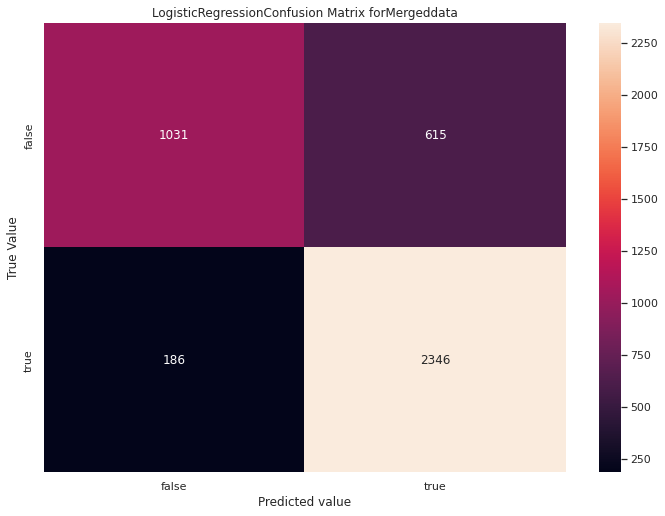

In [48]:

# 2. Apply MachineLearning Model - Logistic Regression
Predict_LR, probs_LR = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'LR')

# 3. Evaluation the ML Model
Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

RandomForestClassifier:
- Random Forest is used to generating trees in a forest and make it random. By generating more trees in the forest, the result is with more accuray.
- Random Forest can be used both for classification and the regression problems.
- Flexible and have very high accuracy.
- Which is used for solving overfitting problem.

MachineLearning Model: RandomForestClassifier
Accuracy of predicted data:  0.9009095260890378
Test_Recall_Score of predicted data:  0.9320695102685624

 Performance Report for model: RandomForest 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1646
           1       0.91      0.93      0.92      2532

    accuracy                           0.90      4178
   macro avg       0.90      0.89      0.90      4178
weighted avg       0.90      0.90      0.90      4178

CONFUSION MATRIX
[[1404  242]
 [ 172 2360]]


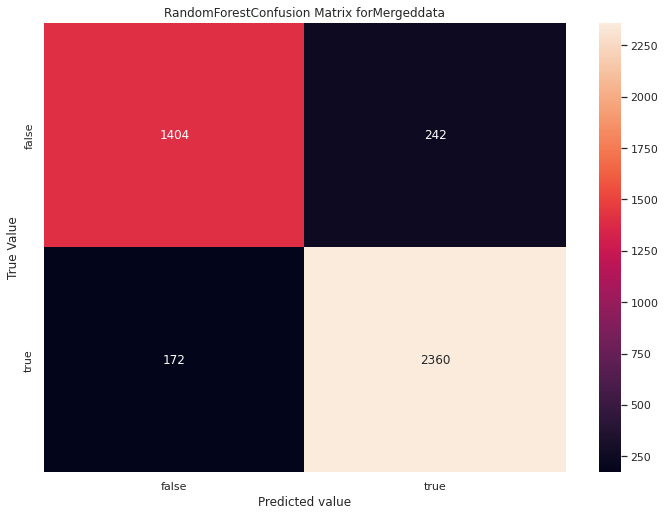

In [49]:

# 1. Split & Apply TfIDF vertorization
#data_name = 'Mergeddata'
#tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Mergeddata)

# 2. Apply MachineLearning Model - RandomForest:
Predict_RF, probs_RF = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'RF')

# 3. Evaluation the ML Model
Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

Decision Tree Classifier:
- The decision tree builds classification and regression models in the form of a tree structure.
- It decomposes a dataset into smaller and builds an associated decision tree.
- There are almost null hyper-parameters to be tuned so it is easy to implement.

MachineLearning Model: DecisionTree
Accuracy of predicted data:  0.9025849688846338
Test_Recall_Score of predicted data:  0.9253554502369669

 Performance Report for model: DecisionTree 

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1646
           1       0.91      0.93      0.92      2532

    accuracy                           0.90      4178
   macro avg       0.90      0.90      0.90      4178
weighted avg       0.90      0.90      0.90      4178

CONFUSION MATRIX
[[1428  218]
 [ 189 2343]]


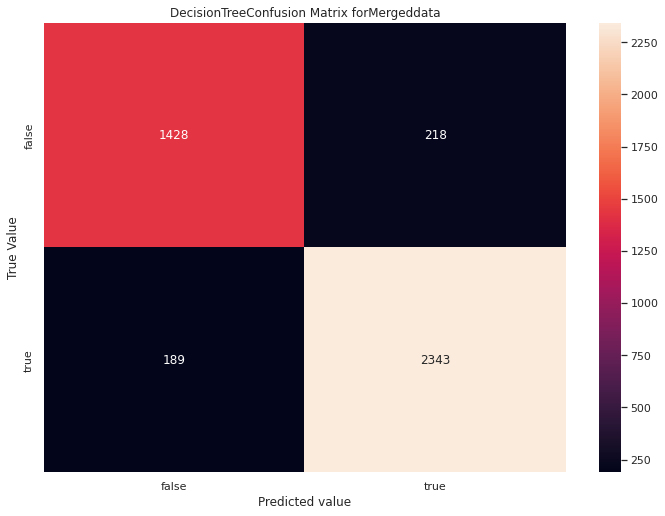

In [50]:
# 1. Split & Apply TfIDF vertorization
#data_name = 'Mergeddata'
#tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Mergeddata)
# 2. Apply MachineLearning Model - DecisionTree:
Predict_DT, probs_DT = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'DT')
# 3. Evaluation the ML Model
Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

 MultinomialNB (Naive_bayes):
  - Which is based on the Bayesian theorem and is suitable for high dimensional data.
  - It handle missing values by ignoring the instance during probability estimate calculations.
  - Robust to isolated noise points and irreralvent attributes.
  - Ref: https://stavanger.instructure.com/courses/10010/files/1096892?module_item_id=179592

MachineLearning Model: MultinomialNB
Accuracy of predicted data:  0.7482048827190043
Test_Recall_Score of predicted data:  0.8665086887835703

 Performance Report for model: MultinomialNB 

              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1646
           1       0.75      0.87      0.81      2532

    accuracy                           0.75      4178
   macro avg       0.74      0.72      0.72      4178
weighted avg       0.75      0.75      0.74      4178

CONFUSION MATRIX
[[ 932  714]
 [ 338 2194]]


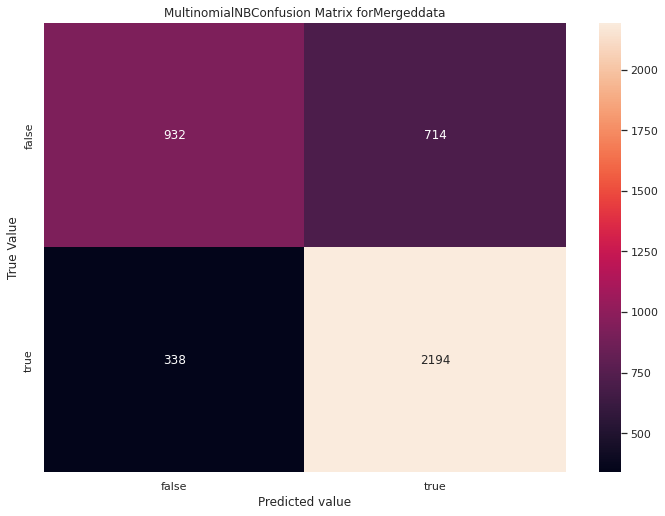

In [51]:
# 1. Split & Apply TfIDF vertorization
#data_name = 'Mergeddata'
#tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Mergeddata)
# 2. Apply MachineLearning Model - MultinomialNB (Naive_bayes):
Predict_NB, probs_NB = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'NB')
# 3. Evaluation the ML Model
Test_Accuracy_nb = MLModel_Evaluation(Predict_NB, y_test, ModelName='MultinomialNB', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

SVM (Support Vector Mechine):
- Used for both classification or regression problems.
- It uses a hyperplane to classify data into 2 different groups.
- SVM is widely used for classifying spam filtering.
- Fast and Effective in high dimensional spaces.
- SVM tries to finds the “best” margin that separates the classes to reduces the risk of error on the data

MachineLearning Model: Support Vector Machine
Accuracy of predicted data:  0.8358066060315941
Test_Recall_Score of predicted data:  0.9316745655608215

 Performance Report for model: Support Vector Machine 

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1646
           1       0.82      0.93      0.87      2532

    accuracy                           0.84      4178
   macro avg       0.84      0.81      0.82      4178
weighted avg       0.84      0.84      0.83      4178

CONFUSION MATRIX
[[1133  513]
 [ 173 2359]]


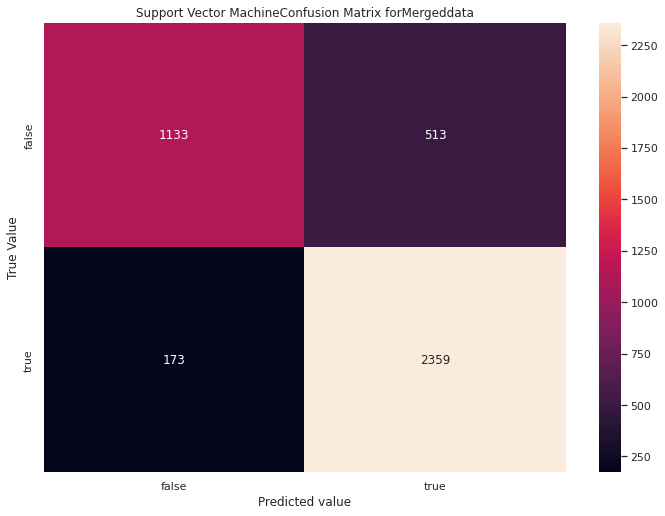

In [52]:
# 1. Split & Apply TfIDF vertorization
#data_name = 'Mergeddata'
#tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Mergeddata)
# 2. Apply MachineLearning Model - SVM:
Predict_svmach, probs_SVM = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'SVM')
# 3. Evaluation the ML Model
Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

- ROC (Receiver Operating Characteristic) curves used  to evaluate different thresholds for classification machine learning problems. 
- ROC curve visualizes a confusion matrix for every threshold.

-https://towardsdatascience.com/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time-fb2304c83a7f


In [53]:
#=====================================
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)


auc_nb = roc_auc_score(y_test, probs_NB)
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_NB)


auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)




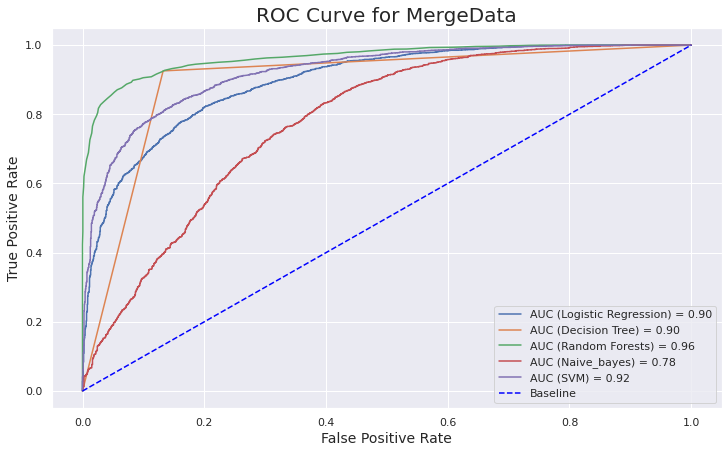

In [54]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive_bayes) = {auc_nb:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for MergeData', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

As per the result, In the combined data(merging those politifact and snopes data) has the high acuuray of 90% using Random Forest and Decision Tree classifier

data_name = 'Bin_politifactDB'

Applying MachineLearning Model and Evaluating the ML model for Politifact data
 


Logistic Regression:

Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
MachineLearning Model: LogisticRegression
Accuracy of predicted data:  0.8116901020126827
Test_Recall_Score of predicted data:  0.9548359608010226

 Performance Report for model: LogisticRegression 

              precision    recall  f1-score   support

           0       0.87      0.55      0.67      1280
           1       0.80      0.95      0.87      2347

    accuracy                           0.81      3627
   macro avg       0.83      0.75      0.77      3627
weighted avg       0

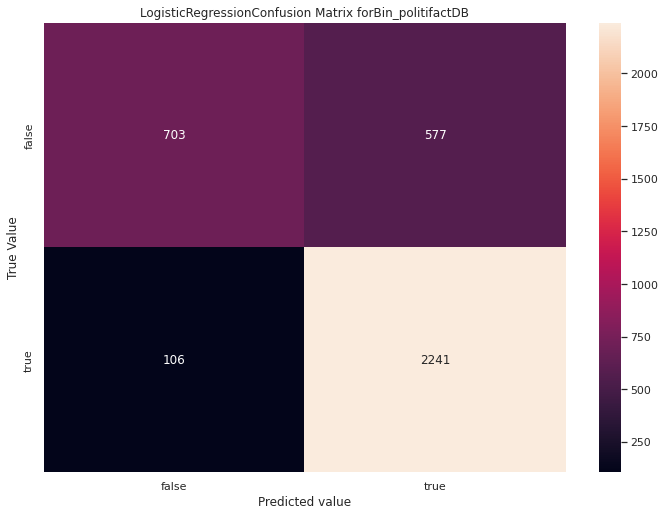

In [55]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_politifactDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_politifactDB)

# 2. Apply MachineLearning Model - Logistic Regression
Predict_LR , probs_LR = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'LR')

# 3. Evaluation the ML Model
Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

RandomForest:

Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
MachineLearning Model: RandomForestClassifier
Accuracy of predicted data:  0.9247311827956989
Test_Recall_Score of predicted data:  0.9765658287175117

 Performance Report for model: RandomForest 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1280
           1       0.91      0.98      0.94      2347

    accuracy                           0.92      3627
   macro avg       0.93      0.90      0.91      3627
weighted avg       0.9

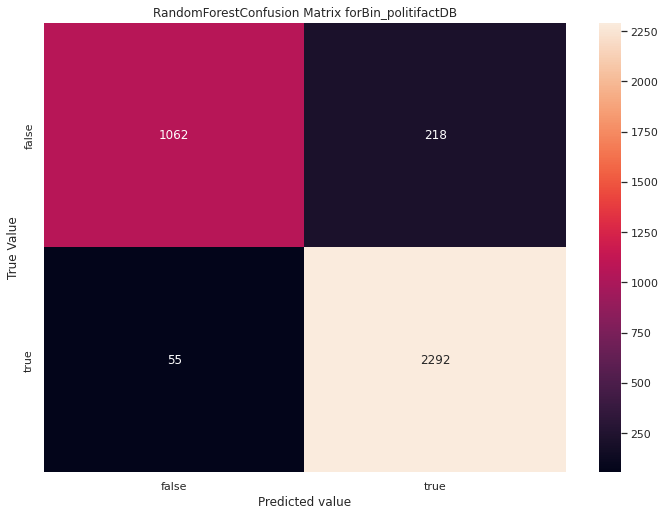

In [56]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_politifactDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_politifactDB)

# 2. Apply MachineLearning Model - RandomForest:
Predict_RF,probs_RF = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'RF')

# 3. Evaluation the ML Model
Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

Decision Tree:

Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
MachineLearning Model: DecisionTree
Accuracy of predicted data:  0.9346567411083541
Test_Recall_Score of predicted data:  0.9522795057520239

 Performance Report for model: DecisionTree 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1280
           1       0.95      0.95      0.95      2347

    accuracy                           0.93      3627
   macro avg       0.93      0.93      0.93      3627
weighted avg       0.93      0.9

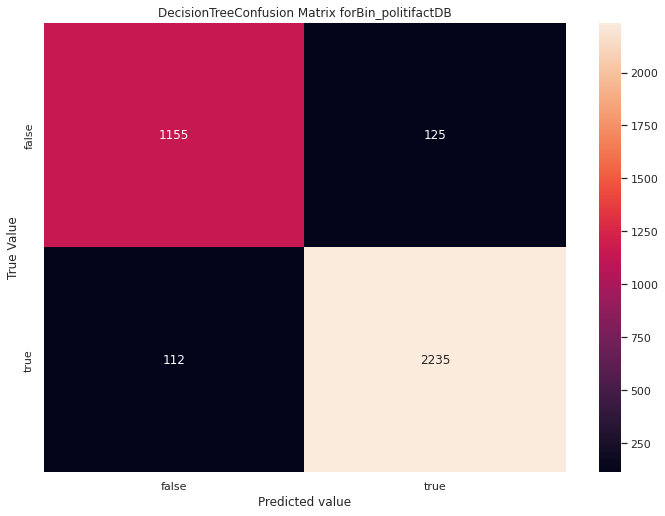

In [57]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_politifactDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_politifactDB)
# 2. Apply MachineLearning Model - DecisionTree:
Predict_DT , probs_DT = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'DT')
# 3. Evaluation the ML Model
Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

MultinomialNB:

Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
MachineLearning Model: MultinomialNB
Accuracy of predicted data:  0.7579266611524677
Test_Recall_Score of predicted data:  0.9186195142735407

 Performance Report for model: MultinomialNB 

              precision    recall  f1-score   support

           0       0.76      0.46      0.57      1280
           1       0.76      0.92      0.83      2347

    accuracy                           0.76      3627
   macro avg       0.76      0.69      0.70      3627
weighted avg       0.76      0

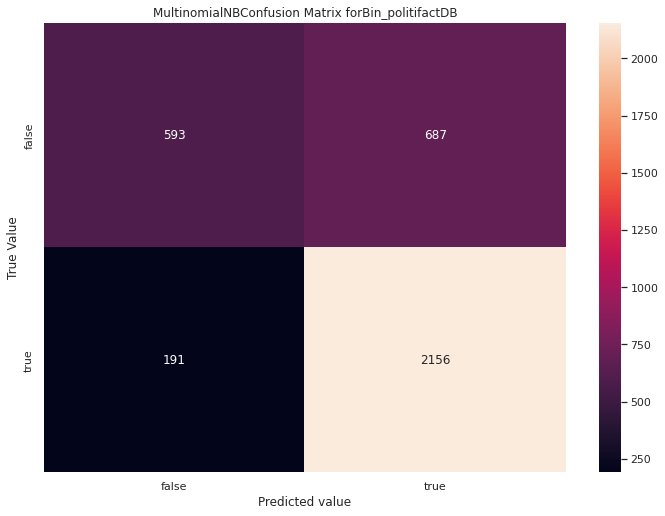

In [58]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_politifactDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_politifactDB)
# 2. Apply MachineLearning Model - MultinomialNB (Naive_bayes):
Predict_NB ,  probs_NB = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'NB')
# 3. Evaluation the ML Model
Test_Accuracy_nb = MLModel_Evaluation(Predict_NB, y_test, ModelName='MultinomialNB', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

SVM:

Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
MachineLearning Model: Support Vector Machine
Accuracy of predicted data:  0.8411910669975186
Test_Recall_Score of predicted data:  0.9535577332765233

 Performance Report for model: Support Vector Machine 

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1280
           1       0.83      0.95      0.89      2347

    accuracy                           0.84      3627
   macro avg       0.85      0.79      0.81      3627
weighted avg

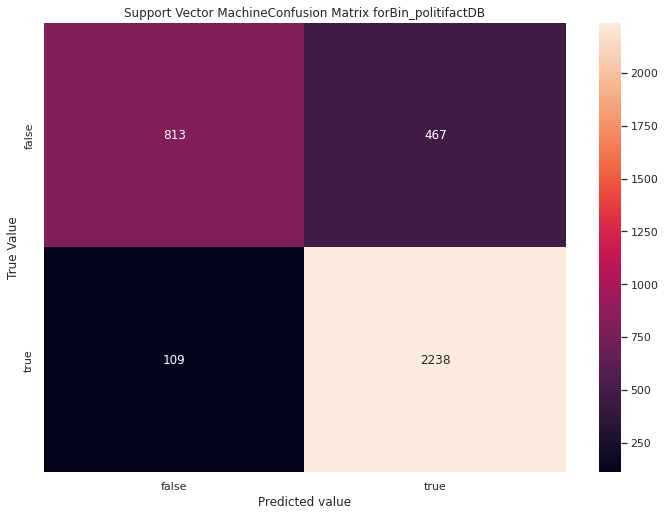

In [59]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_politifactDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_politifactDB)
# 2. Apply MachineLearning Model - SVM:
Predict_svmach, probs_SVM = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'SVM')
# 3. Evaluation the ML Model
Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

As per the result, In the Politifact data has the high acuuray 93% using Random Forest and Decision Tree classifier.

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)


auc_nb = roc_auc_score(y_test, probs_NB)
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_NB)


auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)



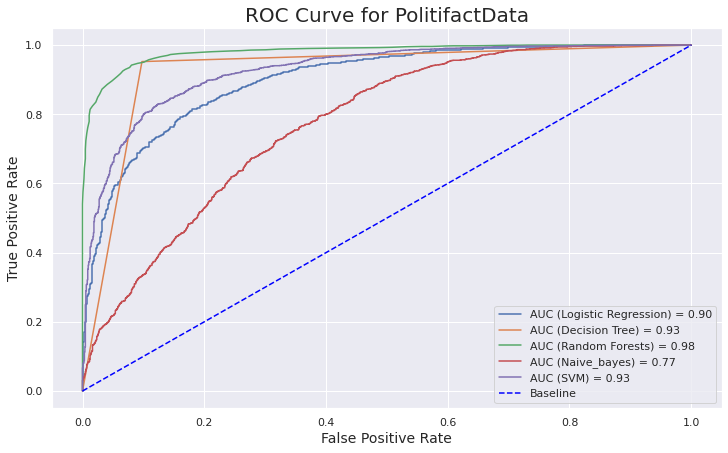

In [61]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive_bayes) = {auc_nb:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for PolitifactData', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

data_name = 'Bin_snopesDB'

Applying MachineLearning Model and Evaluating the ML model for Snopes data

Logistic Regression:

Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
MachineLearning Model: LogisticRegression
Accuracy of predicted data:  0.7840290381125227
Test_Recall_Score of predicted data:  0.15441176470588236

 Performance Report for model: LogisticRegression 

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       415
           1       0.84      0.15      0.26       136

    accuracy                           0.78       551
   macro avg       0.81      0.57      0.57       551
weighted avg       0.80 

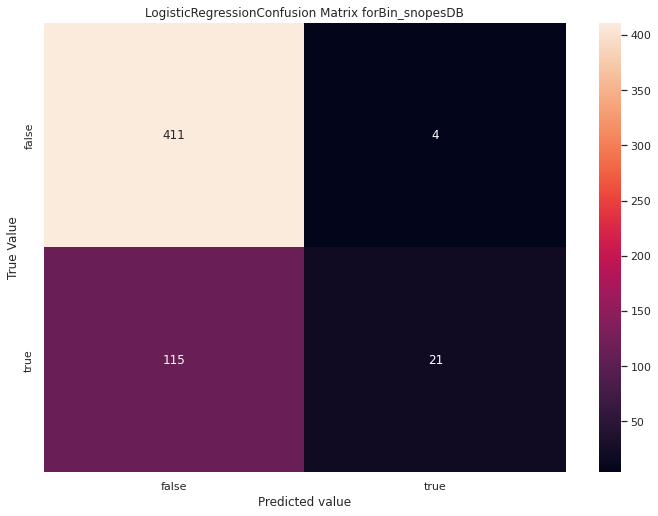

In [62]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_snopesDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_snopesDB)

# 2. Apply MachineLearning Model - Logistic Regression
Predict_LR , probs_LR = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'LR')

# 3. Evaluation the ML Model
Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

Random Forest:

Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
MachineLearning Model: RandomForestClassifier
Accuracy of predicted data:  0.7676950998185118
Test_Recall_Score of predicted data:  0.0661764705882353

 Performance Report for model: RandomForest 

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       415
           1       0.90      0.07      0.12       136

    accuracy                           0.77       551
   macro avg       0.83      0.53      0.49       551
weighted avg       0.80    

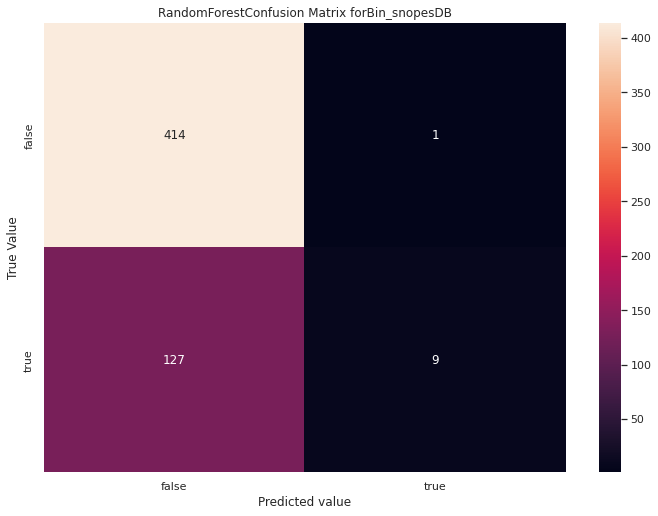

In [63]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_snopesDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_snopesDB)

# 2. Apply MachineLearning Model - RandomForest:
Predict_RF , probs_RF = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'RF')

# 3. Evaluation the ML Model
Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

Decision Tree:

Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
MachineLearning Model: DecisionTree
Accuracy of predicted data:  0.7422867513611615
Test_Recall_Score of predicted data:  0.4632352941176471

 Performance Report for model: DecisionTree 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       415
           1       0.48      0.46      0.47       136

    accuracy                           0.74       551
   macro avg       0.65      0.65      0.65       551
weighted avg       0.74      0.74    

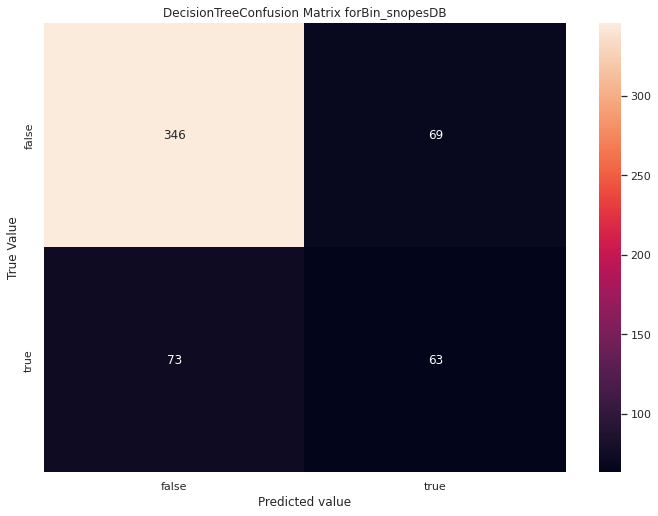

In [64]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_snopesDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_snopesDB)
# 2. Apply MachineLearning Model - DecisionTree:
Predict_DT , probs_DT = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'DT')
# 3. Evaluation the ML Model
Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

MultinomialNB:


Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
MachineLearning Model: MultinomialNB
Accuracy of predicted data:  0.7604355716878403
Test_Recall_Score of predicted data:  0.029411764705882353

 Performance Report for model: MultinomialNB 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       415
           1       1.00      0.03      0.06       136

    accuracy                           0.76       551
   macro avg       0.88      0.51      0.46       551
weighted avg       0.82      0.76

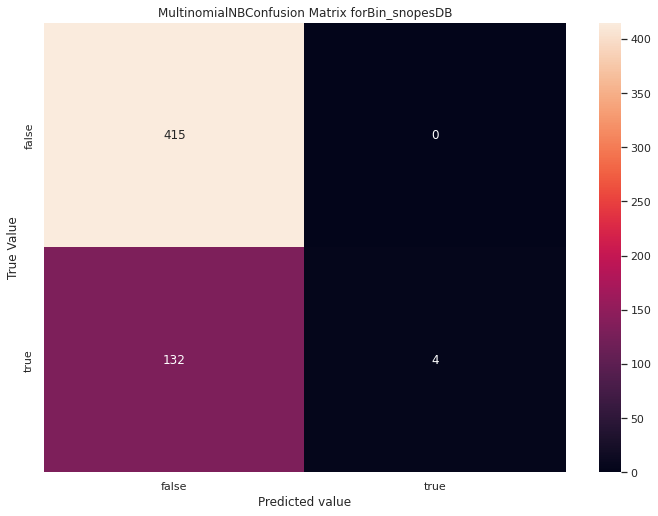

In [65]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_snopesDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_snopesDB)
# 2. Apply MachineLearning Model - MultinomialNB (Naive_bayes):
Predict_NB , probs_NB = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'NB')
# 3. Evaluation the ML Model
Test_Accuracy_nb = MLModel_Evaluation(Predict_NB, y_test, ModelName='MultinomialNB', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

SVM:

Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
MachineLearning Model: Support Vector Machine
Accuracy of predicted data:  0.809437386569873
Test_Recall_Score of predicted data:  0.375

 Performance Report for model: Support Vector Machine 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       415
           1       0.72      0.38      0.49       136

    accuracy                           0.81       551
   macro avg       0.77      0.66      0.69       551
weighted avg       0.80      0.

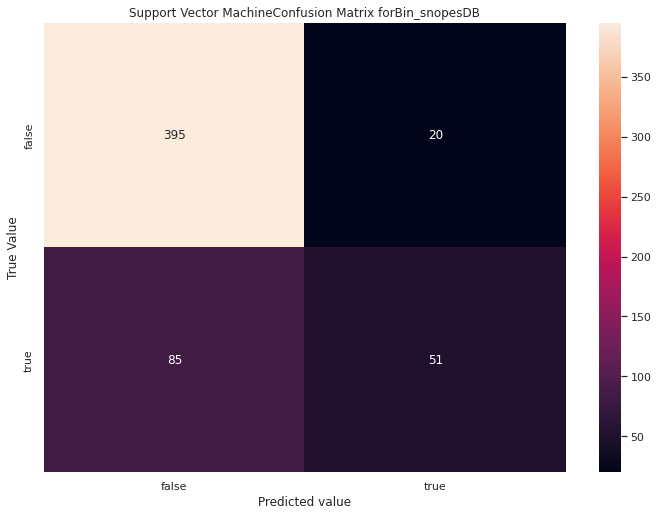

In [66]:
# 1. Split & Apply TfIDF vertorization
data_name = 'Bin_snopesDB'
tfidf_train, tfidf_test, y_train, y_test = spilt_Vectorizar(Bin_snopesDB)
# 2. Apply MachineLearning Model - SVM:
Predict_svmach , probs_SVM = ApplyML_Model(tfidf_train, tfidf_test, y_train,y_test, Model = 'SVM')
# 3. Evaluation the ML Model
Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine', dataname = data_name, ShowReport = True, ConfusionMatrix=True)

As per the result, In the Snopes data has the high acuuray of 81% using SVM classifier.

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)


auc_nb = roc_auc_score(y_test, probs_NB)
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_NB)


auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)


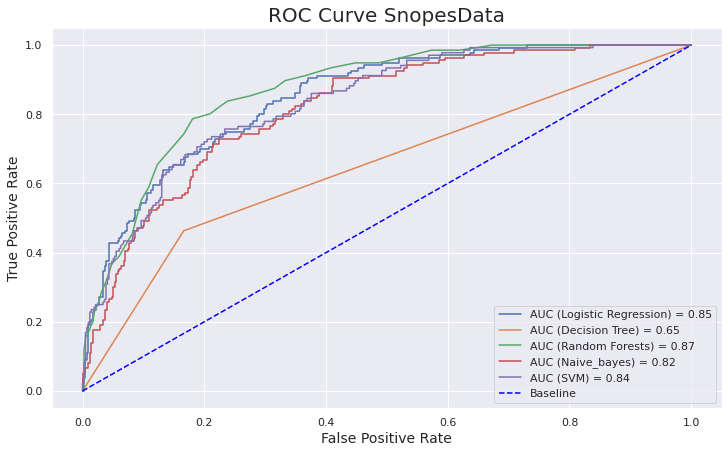

In [68]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive_bayes) = {auc_nb:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve SnopesData', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

### Apply Neural Network classifier, using LSTM:
LSTM Long Short Term Memory (LSTM) is an extenstion of RNN (recurrent neural networks RNN) which handle the long-term dependency problems ( vanishing gradient). 

Before fedding the train data into LSTM Model we need to apply some preprocessing for the text to convert it to a numerical to be to be ready to fed into Neural Network model.
- Vocabulary index: we will create a dictionary of words index by using Tokenizing & padding:
    1. Representing text as numbers (by splitting the sentences into words and creates a dictionary of all unique words found in the text and their uniquely assigned integer). 
    2. Text_To_sequance: Each sentence will be converted to a sequence of word index (array of integers representing all the individual words)
    3. Padding & truncating: Make all sequance at the same length, Padding mean fill the array of wordindex with zeroes at the beginging or at the end and make Truncating for long sequences to make all the sequances at the same length (max_length).
- Word Embedding is a numerical representaton of text which convert the text into numerical matrix.
There are many techniques for word embedding like word2vec, TF-IDF Transform (Pre-Trained word embedding like Gensim, GloVe and the untrained word Embedding which can be trained into Embedding layer in Keras with random weights)
- we use Pre-Trained word embedding GloVe.


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorboard.plugins.hparams import api as hp
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#%load_ext tensorboard
from matplotlib import pyplot as plt
import datetime, os
# use GBU
os.environ["CUDA_VISIBLE_DEVICES"]="7"


- Loading word embedding GloVe

In [ ]:
print('Loading word embedding GloVe...')
import os

embeddings_index = {}

f = open('glove.6B.100d.txt', encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefsVector = np.asarray(values[1:], dtype='float32')    
    embeddings_index[word] = coefsVector        
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Loading word embedding GloVe...
Found 400001 word vectors.


- Use the following Hyper parameter in our LSTM Model

In [ ]:
oov_tok = "<OOV>"
Voc_size = 10000
Maxlen = 300 # will be changed depends on which data we will implement LSTM Model
Embeddinglayer= 'Pre-Trained'
num_epochs = 10  # can be change before running the LSTM Model
File_name = ""  # i will change the value each time i run the model to save Hyperparameter in tenserboard

#HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32, 64, 128]))  # we can use it for batch_size also
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))  # we can use it for batch_size also
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.2, 0.3]))
# i removed learnig rate 0.003 , it increase the cost 
#HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.001, 0.003]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.001]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'rmsprop']))
# I remove 'tanh' i get bad result through execucting 
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['relu']))
#log_dir = os.path.join(working_dir, 'logs') This directory should not be reused by any other callbacks.
log_dir = './logs'
Hyperparam_dir = './logs/hparam_tuning/'



- Use tf.summary module for writing summary data. To be visualized in TensorBoard.

In [ ]:
# I take this code from hands.on for LSTM
METRIC_ACCURACY = 'accuracy'
METRIC_PRECISION = 'precision'
METRIC_RECALL = 'recall'
METRIC_LOSS = 'loss'

hyParams = [HP_OPTIMIZER, HP_NUM_UNITS, HP_DROPOUT, HP_LEARNING_RATE] 
with tf.summary.create_file_writer(Hyperparam_dir).as_default():
    hp.hparams_config(
        hparams=hyParams,
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy'),                 
                 hp.Metric(METRIC_LOSS, display_name='Loss'),
                 hp.Metric(METRIC_PRECISION, display_name='Precision'),
                 hp.Metric(METRIC_RECALL, display_name='Recall')],
      )


- To change the optimizer algorithim when we make compile for LSTM model, we will use this function which take two arguments(algorithm and learning rate)

In [ ]:
def get_opt_algo(algo, learning_rate):
    #Depending on the optimization algo specified create the algo object with specified learning rate
    if algo == 'rmsprop':
        opt_algo = tf.keras.optimizers.RMSprop(learning_rate)
    else: # algo == 'adam':
        opt_algo = tf.keras.optimizers.Adam(learning_rate)
    return opt_algo
   

##### Implementing LSTM Model
Create some functions to implement the following steps:
1. Splitting the Data into Training and testing parts.
2. Vertorization & Word Embedding
3. Create the LSTM Model
4. Fit the Model
5. Evaluating & plot the Accuracy

In [ ]:
# Convert Text To sequance
def Convert_TextTo_sequance(X_Traindata, X_TestData):

    #print('Tokenizing: split the text into Tokens (words)')
    tokenizer = Tokenizer(num_words = Voc_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(X_Traindata)

    word2idx = tokenizer.word_index
    Vocabulary_size = len(word2idx) +1
    #print ('Word_index size (vocabulary_size) is', Vocabulary_size)

    # Convert Token to sequance of word index
    #print('Convert Tokens to sequance  of word index')
    training_sequences = tokenizer.texts_to_sequences(X_Traindata)

    testing_sequences = tokenizer.texts_to_sequences(X_TestData)

    # Pad_sequence : we have to make all text of fixed length = Maxlen
    #print('Padding & truncating')
    X_train_sequance = pad_sequences(training_sequences, maxlen=Maxlen, padding='post', truncating='post')

    X_test_sequance = pad_sequences(testing_sequences, maxlen=Maxlen, padding='post', truncating='post')
    
    return word2idx, Vocabulary_size, X_train_sequance, X_test_sequance



In [ ]:
#import numpy as np

# create a weight matrix for words in training docs
def Create_Embedding_Matrix(Vocabulary_size, embedding_size, word2idx):	
	words= 0
	embedding_matrix = np.zeros((Vocabulary_size, embedding_size))
	for word, i in word2idx.items():
		embedding_vector = embeddings_index.get(word)
    	# words not found in embedding index will be all-zeros.
		if embedding_vector is not None:
			embedding_matrix[i] = embedding_vector
		else:
			words +=1
  	
	#print('words_not_found: ', words)
	return embedding_matrix

In [ ]:
# split data into two parts Training & Testing
# split data into two parts Training & Testing
def SplitData_Vectorizing(Data, DataName):
    # 1- Split the Data into training and testing parts
    print('1. Split the',DataName,'Data into training and testing parts\n','-'*100)
    X_train, X_test, y_train, y_test = SplitData(Data)
    if DataName == 'politifactDB' or DataName == 'MergedDB':
        Maxlen = MaxWords_politifactDB        
    elif DataName == 'snopes':
        Maxlen = MaxWords_snopesDB
    else:
        Maxlen = 700
    
    print('Avarage wordCounts:', int(math.floor(Maxlen)))
    
    # 2.Convert Text to sequances
    print('Convert Text to sequances\n','-'*100)
     
    word2idx, Vocabulary_size, X_train_sequance, X_test_sequance = Convert_TextTo_sequance(X_train, X_test)
    embedding_size = 100 
    #print('create a weight matrix for words in training docs')
    embedding_matrix = Create_Embedding_Matrix(Vocabulary_size, embedding_size, word2idx)
    Resultlist = {'Vocabulary_size':Vocabulary_size, 'embedding_size': embedding_size }
    return Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test
    

####  Buliding Machine learning model using LSTM 
- Build a sequential model with the following layers:

    1. Embedding layer: 
        This input layer converts each word in the text into a fixed-length dense vector of size embedding_dim. It requires that the input data is integer (each word represented as a unique index) The input argument equal to the vocabulary size, and the output dimension is the size of the output vectors for each word will be equal to embedding_dim we will specify. The third argument is input_length which specify the length of input sequences, weights: the embedding matrix which we create it from GloVe (PreTrained word embedding)        
    2. layer2: A bidirectional LSTM layer of number of units detected from Hyperparameter.
    3. Dense layer1: Hidden layer of number of units with activation value detected from Hyperparameter..    
    4. Dense layer2 (output layer): contains 1 unit (0 or 1) for binary classifier and we will used sigmoid as activation function.

In [ ]:
# build the LSTM model, Fitting
def Build_LSTMmodel(Vocabulary_size, embedding_size, embedding_matrix, hyperParams):

    
    model_lstm = tf.keras.Sequential()
    if Embeddinglayer == 'Pre-Trained': # GloVe
        model_lstm.add(tf.keras.layers.Embedding(Vocabulary_size, output_dim= embedding_size, weights=[embedding_matrix], input_length=Maxlen, trainable=False))
    else:
        model_lstm.add(tf.keras.layers.Embedding(Voc_size, embedding_size, input_length=Maxlen, trainable=True))
        
    model_lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = embedding_size, dropout= hyperParams[HP_DROPOUT])))
    model_lstm.add(tf.keras.layers.Dense(units = hyperParams[HP_NUM_UNITS], activation=hyperParams[HP_ACTIVATION]))
    model_lstm.add(tf.keras.layers.Dropout(hyperParams[HP_DROPOUT]))
    model_lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    
    # old method tried with only re-trained layer 
    '''model_lstm = tf.keras.Sequential([      
        tf.keras.layers.Embedding(Vocabulary_size, output_dim= embedding_size, weights=[embedding_matrix], input_length=Maxlen, trainable=False),    
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = embedding_size, dropout= hyperParams[HP_DROPOUT])),     
        tf.keras.layers.Dense(units = hyperParams[HP_NUM_UNITS], activation=hyperParams[HP_ACTIVATION]),     
        tf.keras.layers.Dropout(hyperParams[HP_DROPOUT]),    
        tf.keras.layers.Dense(units=1, activation='sigmoid')    
    ])'''


    opt_algo = get_opt_algo(hyperParams[HP_OPTIMIZER], hyperParams[HP_LEARNING_RATE])
    # Compile the model 
    #model_lstm.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])    
    model_lstm.compile(optimizer=opt_algo, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])


    model_lstm.summary()    
    return model_lstm


#### - Training the Model & Evaluating:
- Fitting: Train the model by dividing the data into "batches" of size batch_size, and repeatedly iterating over the entire set for a given number of epochs.
some important argument in fitting:
- Validation_data: The model will iterate over the validation dataset and compute the validation loss and validation metrics(accuracy, prcision, recall)
Early Stopping in Keras
Keras supports the early stopping of training via a callback called EarlyStopping.
- Callbacks: is an object that can perform actions at various stages of training. We use EarlyStopping callback which will stop training when the chosen performance measure like 'loss_val' stops improving.
- We use also use TensorBoard callback after every batch of training to monitor model metrics.
- Evaluation: To check whether the model is the best fit for the problem statement, and to estimate the general accuracy of the model.

https://keras.io/api/callbacks/

In [ ]:
%load_ext tensorboard

In [ ]:

from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import tensorflow as tf
import datetime, os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def Fitting(model_lstm, x_trainDB, y_trainDB, x_testDB, y_testDB, hyperParams):
    print('Start Fitting LSTM Model...\n', '-'*100)
    log_dir = "./logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    callbacks_list = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1),            
        #log_dir = './logs'
        # use histogram_freq=1 to add each epoch
        tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
        #CSVLogger logs epoch, acc, loss, val_acc, val_loss        
        tf.keras.callbacks.CSVLogger('LSTM_logs.csv', separator=",", append=False)
    ]
            
    #validation_split=0.2
    #  I tried batch_size = 64, 128 when Embeddinglayer from scratich but I got message mean out of memeory
    if Embeddinglayer == 'Pre-Trained':
        history = model_lstm.fit(x=x_trainDB, y=y_trainDB, epochs=num_epochs,  batch_size = hyperParams[HP_NUM_UNITS], 
                             validation_data=(x_testDB, y_testDB), callbacks=[callbacks_list])
    else:
        history = model_lstm.fit(x=x_trainDB, y=y_trainDB, epochs=num_epochs,  batch_size = 32, 
                             validation_data=(x_testDB, y_testDB), callbacks=[callbacks_list])
        
    return history, model_lstm


In [ ]:
# plot Accurancy & loss vs epoch
def plotModel(data1, data2, xlabel, ylabel, Title):       
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))    
    fig = plt.figure(figsize=(8,5))
    axes = fig.add_axes([0,0,1,1])
  
    axes.plot(data1)                # exp: accuracy
    axes.plot(data2)               # exp: val_accuracy
    axes.set_title(Title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)    
    axes.legend(['train', 'val'], loc='upper left')
    plt.show()



In [ ]:
#Build- Train- Evaluation 
def Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test,  hparams):
    # 1-Build the Model
    model_lstm = Build_LSTMmodel(Resultlist['Vocabulary_size'], Resultlist['embedding_size'], embedding_matrix, hparams)

    # 2- Train 
    history, model_lstm = Fitting(model_lstm, X_train_sequance, y_train, X_test_sequance, y_test, hparams)
    
    # 3- Evaluate    
    print('Evaluating LSTM Model...\n', '-'*100)
    score = model_lstm.evaluate(X_test_sequance, y_test)
    loss = score[0]
    accuracy = score[1]
    percision = score[2]
    recall = score[3]  
  
       
    return loss, accuracy, percision, recall, history , model_lstm  
       

In [ ]:

# this function from handson and i didi some updats
def run_LSTMModel_Hyperparameter(run_dir, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial        
        loss, accuracy, prec, recall, history, LSTMModel = Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test, hparams)

        print('='*100)
        print('Test Accuracy:', accuracy, ' Test loss:',loss, ' Test Percision:',prec, ' Test recall:', recall )
        print('='*100)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        tf.summary.scalar(METRIC_LOSS, loss, step=1)        
        tf.summary.scalar(METRIC_PRECISION, prec, step=1)
        tf.summary.scalar(METRIC_RECALL, recall, step=1)
    return history, LSTMModel


In [ ]:
# Take the code from hands on LSTM and make some updates
def ExecuteModel_withHyperparameter(data, dataName):
    session_num = 0
    Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)
    for optimizer in HP_OPTIMIZER.domain.values:
        for activation in HP_ACTIVATION.domain.values:        
            for num_units in HP_NUM_UNITS.domain.values:            
                for dropout_rate in HP_DROPOUT.domain.values:
                    for learning_rate in HP_LEARNING_RATE.domain.values:
                        hparams = {
                            HP_NUM_UNITS: num_units,
                            HP_DROPOUT: dropout_rate,
                            HP_OPTIMIZER: optimizer,
                            HP_ACTIVATION: activation,
                            HP_LEARNING_RATE: learning_rate                   
                            }
                        File_name = "run-%d" % session_num
                        print('--- Starting trial: %s' % File_name)
                        print({h.name: hparams[h] for h in hparams})  
                        #run('logs/hparam_tuning/' + run_name, hparams)                       
                        #history = run_LSTMModel(Hyperparam_dir + run_name, hparams, data, dataName)
                        history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)
                        plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
                        plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
                        session_num += 1
                        

Running Steps:
- Run LSTM Model on Snopes Data 
- we run the model on Snopes Data with unTrainable Word embedding
- Scecond run the model on Snopes Data with Pre-Trainable Word Embedding GloVe. 

In [ ]:

# First run 
session_num = 1
num_epochs = 8
dataName = 'snopes'
data = Bin_snopesDB
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'scratch'
# Embeddinglayer= 'Pre-Trained';

# Split the Data
Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)

hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
print({h.name: hparams[h] for h in hparams})     
run_name = "run-%d" % 1                  
history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

# print Leaning curve

plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)


 Starting trial with epochs: 8  For Data: snopes
----------------------------------------------------------------------------------------------------
1. Split the snopes Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
Avarage wordCounts: 300
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
 Starting trial with epochs: 8  For 

Result Evaluation:
- The Learning curve shows that there are overfitting in Snops Dataset when we use create (word-Embedding-weights) from scratch.
- I run the LSTM model many time and try to change the hyper parameters but the overfitting still exists until then i tried to run PreTrained Glove to improve the result. you can see the results in the reports
- When i tried to run this function ExecuteModel_withHyperparameter(data, dataName) it takes around 500min and about 25 iteration give me error in memeory so i stopped this function. (tried in Visual studio not google colab)
- I will run LSTM on Politifact data & merge Data using GloVe.


 Starting trial with epochs: 8  For Data: snopes
----------------------------------------------------------------------------------------------------
1. Split the snopes Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
 Starting trial with epochs: 8  For Data: snopes
-----------

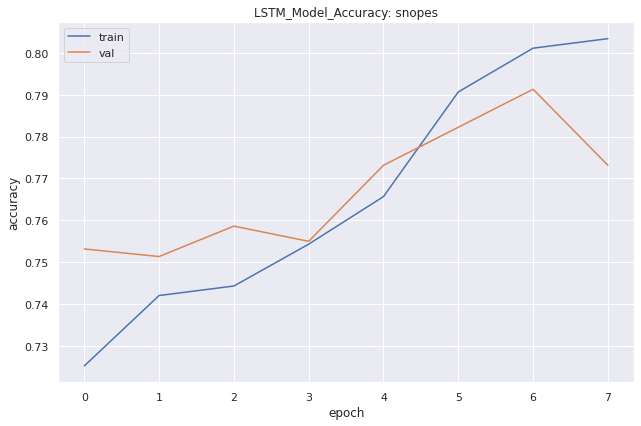

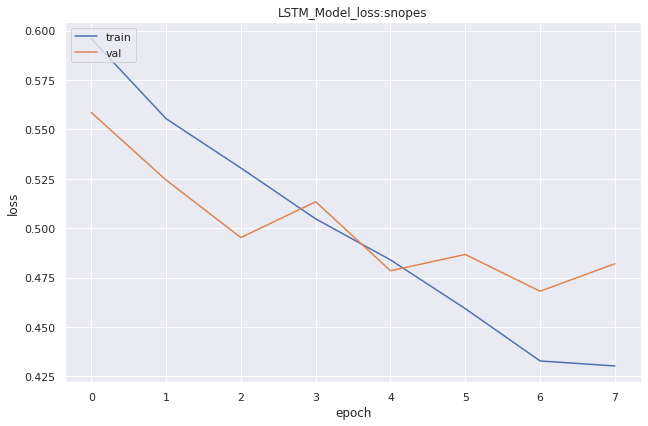

In [ ]:
# Second: Run LSTM using GloVe on Snopes
session_num = 1
num_epochs = 8
dataName = 'snopes'
data = Bin_snopesDB
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';

Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)
# I  tried all but i saw that the reasult almost same also i tried to change number of epoch to 20 
#hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
print({h.name: hparams[h] for h in hparams})     
run_name = "run-%d" % 1                  
history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)


##### The Result for Running LSTM using GloVe
- I  tried all these hyper parameters and write the results in a table. (Please refer to the report)
- hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
- hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
- hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
- I tried also to change the optimizer to rmsprop but it does not make any improvement, finally, i tried to change the learning rate to 0.003 but it increased the loss value, also using Tanh as an activation function reflects with an opposite way on the loss value.

- Apply LSTM Model on Politifact Dataset

 Starting trial with epochs: 10  For Data: politifactDB
----------------------------------------------------------------------------------------------------
1. Split the politifactDB Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
 Starting trial with epochs: 10  For Data:

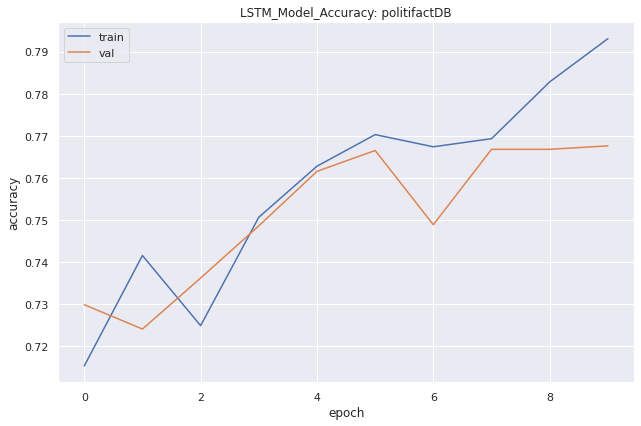

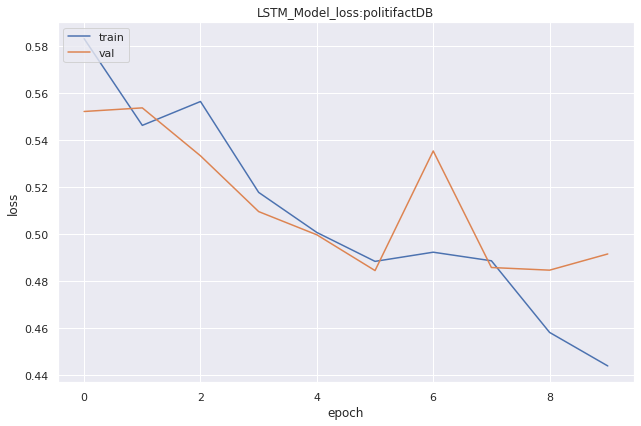

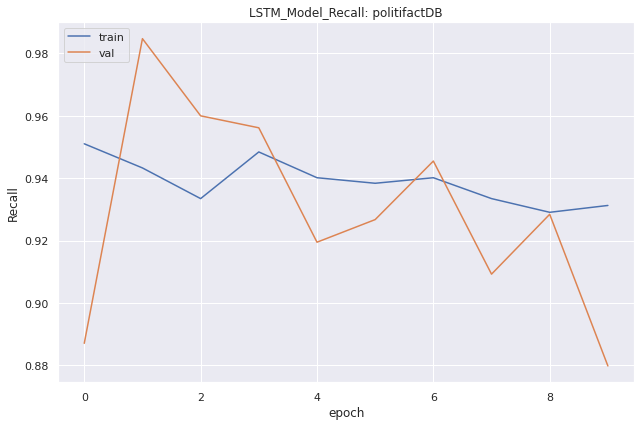

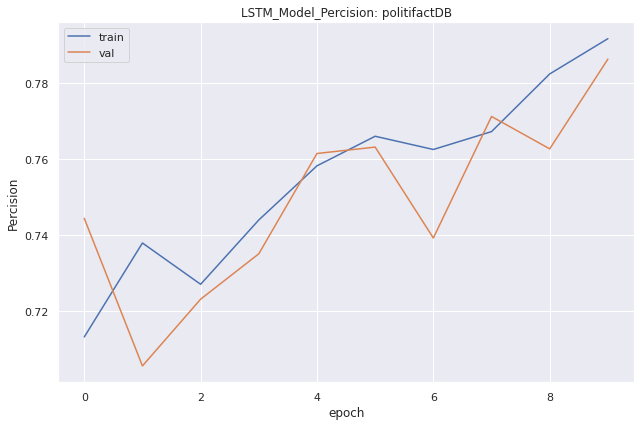

In [ ]:

# Run LSTM using Glove - First Run 
num_epochs = 10
session_num = 2
dataName = 'politifactDB'

data = Bin_politifactDB

print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';

Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)
# I  tried
hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
print({h.name: hparams[h] for h in hparams})     
run_name = "run-%d" % 1                  
history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
plotModel(history.history['recall'], history.history['val_recall'], 'epoch', 'Recall','LSTM_Model_Recall: '+ dataName)
plotModel(history.history['precision'], history.history['val_precision'], 'epoch', 'Percision','LSTM_Model_Percision: '+ dataName)


Run LSTM on MergeData

 Starting trial with epochs: 8  For Data: Mergedata
----------------------------------------------------------------------------------------------------
1. Split the Mergedata Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (16709,) Testing dataset: (4178,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  39.63 % , with records count:  6621
Percentage of False News transactions in train set:  60.37 % , with records count:  10088
Percentage of True News transactions in test set:  39.4 % , with records count:  1646
Percentage of False News transactions in test set:  60.6 % , with records count:  2532
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
 Starting trial with epochs: 8  For Data: Mergedat

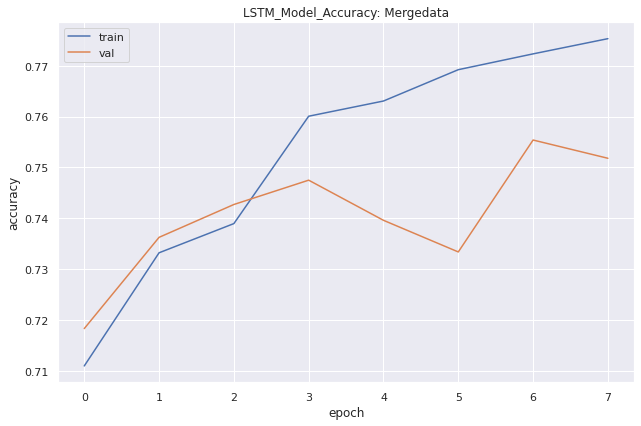

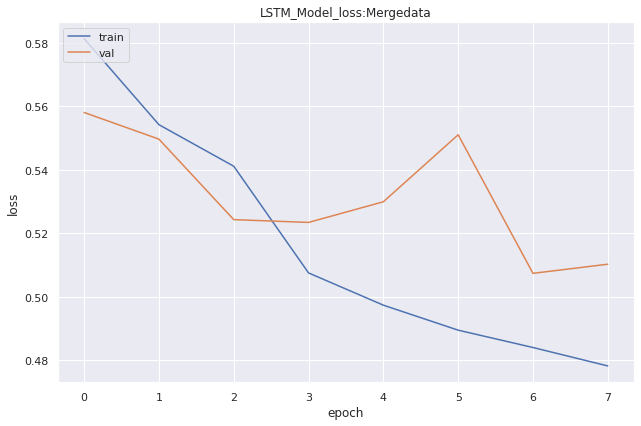

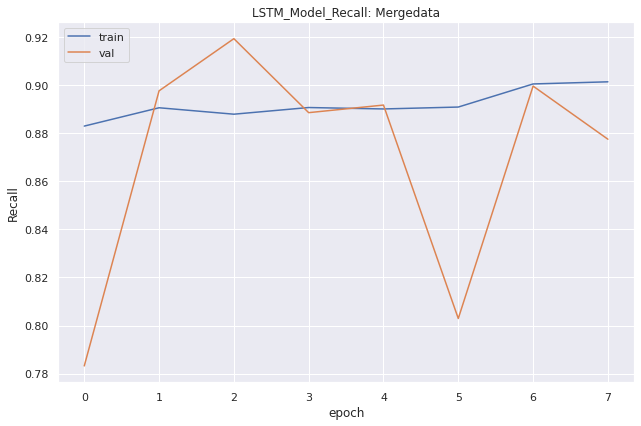

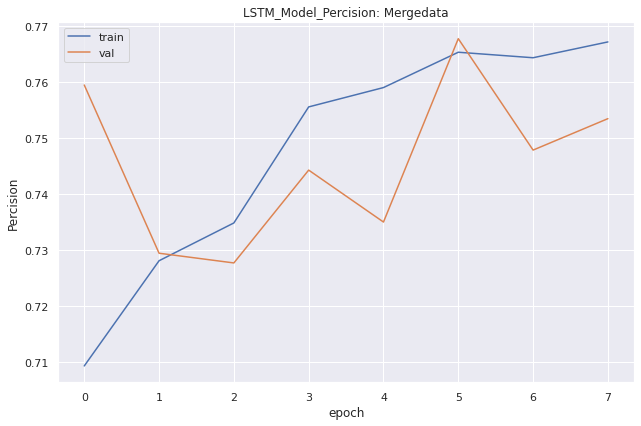

In [ ]:

# Test Here
num_epochs = 8 # decrese the number of epoch to get the result faster
session_num = 2

dataName = 'Mergedata'
data = Mergeddata

print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';  # GloVe

Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)
# I  tried
hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
print({h.name: hparams[h] for h in hparams})     
run_name = "run-%d" % 1                  
history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

#y_predict = lr.predict(X_test)
probs_LSTMmodel = LSTMModel.predict_proba(X_test_sequance)[:, 1]

plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
plotModel(history.history['recall'], history.history['val_recall'], 'epoch', 'Recall','LSTM_Model_Recall: '+ dataName)
plotModel(history.history['precision'], history.history['val_precision'], 'epoch', 'Percision','LSTM_Model_Percision: '+ dataName)



- We can notice that the accuracy is better in politifact than Snopes and merged Data.
- Tried to run LSTM on Merge Data without preprocessing.

In [ ]:
# we use this function to print classification_Report & confusion matrix for each model
def printClassReport_ConfusionMatrix(modelName, y_true, y_predict):    
    print("\n DT Performance Report: \n")        
    print(classification_report(y_true, y_predict))        
    # CONFUSION MATRIX 
    # Define confusion matrix 
    plt.figure(figsize=(10,7))
    cf_matrix = confusion_matrix(y_true, y_predict)
    # Print CONFUSION MATRIX Table
    print('='*100)
    print('CONFUSION MATRIX')
    print(cf_matrix)

    #Plot CONFUSION MATRIX
    categories = ['false', 'true']

    sns.heatmap(cf_matrix, annot=True, fmt = 'd', xticklabels=categories,yticklabels=categories)
    
    plt.ylabel('True value')
    plt.xlabel('Predicted value') 
    plt.title('Confusion Matrix for '+modelName)

 Starting trial with epochs: 8  For Data: politifactDB_P
----------------------------------------------------------------------------------------------------
1. Split the politifactDB_P Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (14507,) Testing dataset: (3627,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  34.03 % , with records count:  4937
Percentage of False News transactions in train set:  65.97 % , with records count:  9570
Percentage of True News transactions in test set:  35.29 % , with records count:  1280
Percentage of False News transactions in test set:  64.71 % , with records count:  2347
Avarage wordCounts: 700
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
{'num_units': 1

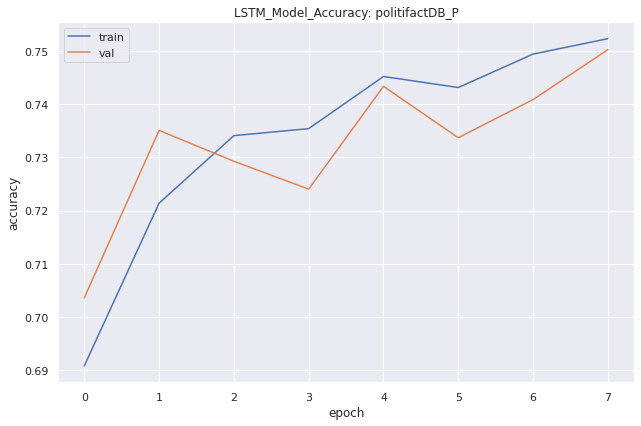

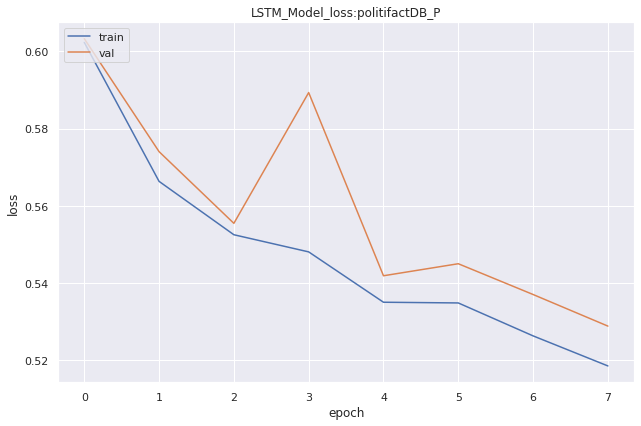

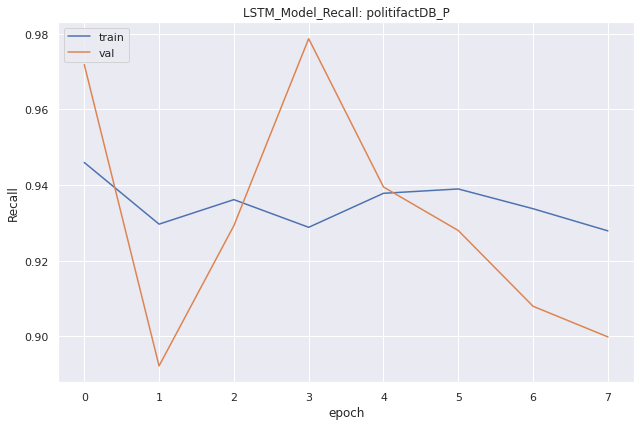

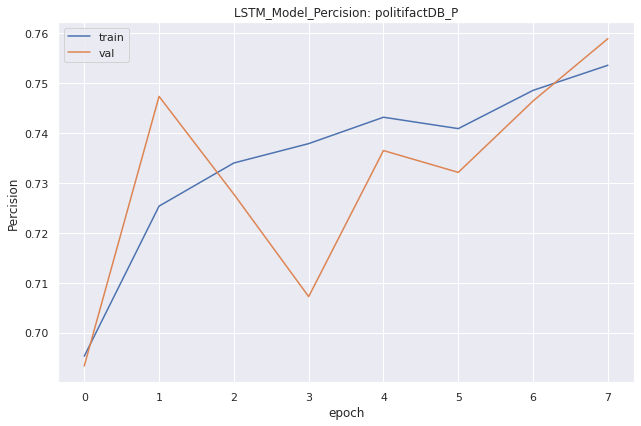

In [ ]:
# Run LSTM using Glove on PolitData before preprocessing

num_epochs = 8
session_num = 2
dataName = 'politifactDB_P'

data = Bin_politifactDB_P

print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';


Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)


hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}

print({h.name: hparams[h] for h in hparams})     
#run_name = "run-%d" % 1      

loss, accuracy, prec, recall, history, LSTMModel = Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test, hparams)            
#history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

print('Test accuracy:', accuracy,' Test loss:', loss, ' Test recall:', recall, ' Test Precision:', prec)
plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
plotModel(history.history['recall'], history.history['val_recall'], 'epoch', 'Recall','LSTM_Model_Recall: '+ dataName)
#it needs

plotModel(history.history['precision'], history.history['val_precision'], 'epoch', 'Percision','LSTM_Model_Percision: '+ dataName)

# Generate predictions (probabilities -- the output of the last layer)
#Predicting from test data
y_pred = LSTMModel.predict(X_test_sequance) # Predicting from test data
#accuracy_score(y_test,y_pred)
y_pred = np.argmax(y_pred, axis = 1)
# we use this function to print classification_Report & confusion matrix for each model
#printClassReport_ConfusionMatrix('LSTM_Model', y_test, y_pred)
#68min

 Starting trial with epochs: 8  For Data: Mergedata_P
----------------------------------------------------------------------------------------------------
{'num_units': 64, 'dropout': 0.3, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          8092000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                12864     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                              

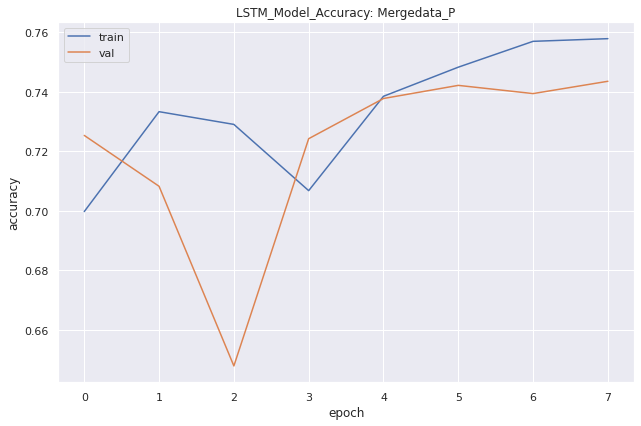

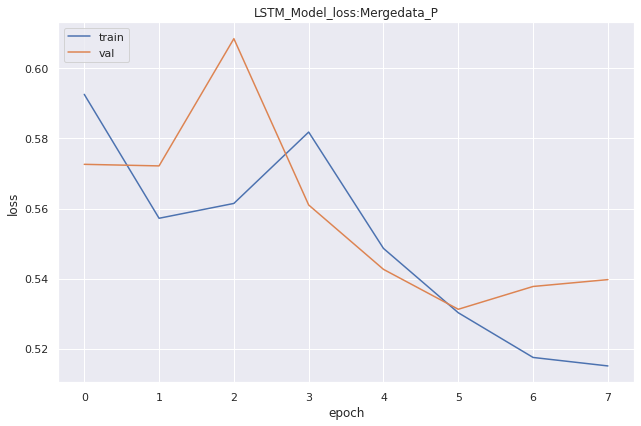

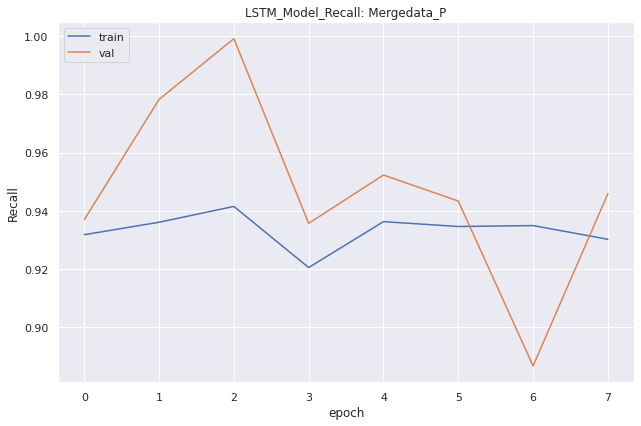

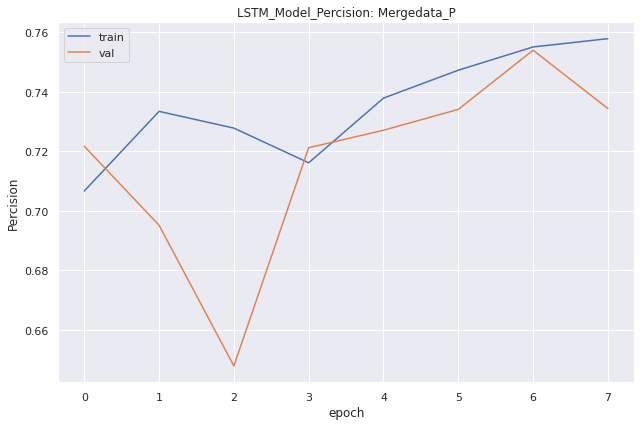

In [ ]:
# Run LSTM using Glove on PolitData before preprocessing

num_epochs = 8
session_num = 2
dataName = 'Mergedata_P'

data = Mergeddata

print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';


#Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = SplitData_Vectorizing(data, dataName)


hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}

print({h.name: hparams[h] for h in hparams})     
#run_name = "run-%d" % 1      

loss, accuracy, prec, recall, history, LSTMModel = Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test, hparams)            
#history, LSTMModel = run_LSTMModel_Hyperparameter(Hyperparam_dir + File_name, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

print('Test accuracy:', accuracy,' Test loss:', loss, ' Test recall:', recall, ' Test Precision:', prec)
plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
plotModel(history.history['recall'], history.history['val_recall'], 'epoch', 'Recall','LSTM_Model_Recall: '+ dataName)
#it needs

plotModel(history.history['precision'], history.history['val_precision'], 'epoch', 'Percision','LSTM_Model_Percision: '+ dataName)

# Generate predictions (probabilities -- the output of the last layer)
#Predicting from test data
y_pred = LSTMModel.predict(X_test_sequance) # Predicting from test data
#accuracy_score(y_test,y_pred)
y_pred = np.argmax(y_pred, axis = 1)
# we use this function to print classification_Report & confusion matrix for each model
#printClassReport_ConfusionMatrix('LSTM_Model', y_test, y_pred)
#68min

In [ ]:
#printClassReport_ConfusionMatrix('LSTM_Model', y_test, y_pred)




Series([], Name: label, dtype: object)

In [ ]:
from sklearn.metrics import accuracy_score, , classification_report
# Try to predict the last model on merge data we can use it after each data
#loss, accuracy, prec, recall, history, LSTMModel = Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test, hparams)            

#Predicting from test data
y_pred = LSTMModel.predict(X_test_sequance) # Predicting from test data
#accuracy_score(y_test,y_pred)
y_pred = np.argmax(y_pred, axis = 1)
# we use this function to print classification_Report & confusion matrix for each model
printClassReport_ConfusionMatrix('LSTM_Model', y_test, y_pred)

 Starting trial with epochs: 8  For Data: snopes
----------------------------------------------------------------------------------------------------
1. Split the snopes Data into training and testing parts
 ----------------------------------------------------------------------------------------------------
Training dataset: (2202,) Testing dataset: (551,)
----------------------------------------------------------------------------------------------------
Percentage of True News transactions in train set is:  74.25 % , with records count:  1635
Percentage of False News transactions in train set:  25.75 % , with records count:  567
Percentage of True News transactions in test set:  75.32 % , with records count:  415
Percentage of False News transactions in test set:  24.68 % , with records count:  136
Avarage wordCounts: 300
Convert Text to sequances
 ----------------------------------------------------------------------------------------------------
--- Starting trial: run-0
{'num_unit

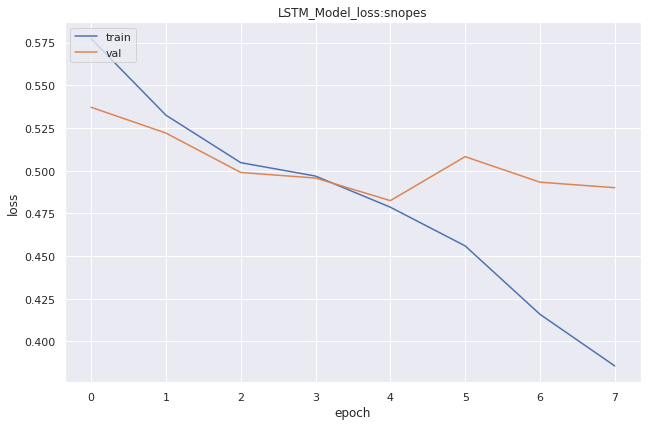

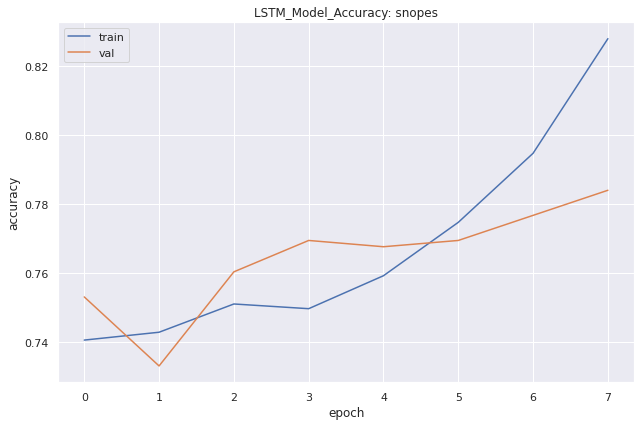

--- Starting trial: run-1
{'num_units': 64, 'dropout': 0.3, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_4 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                12864     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                           

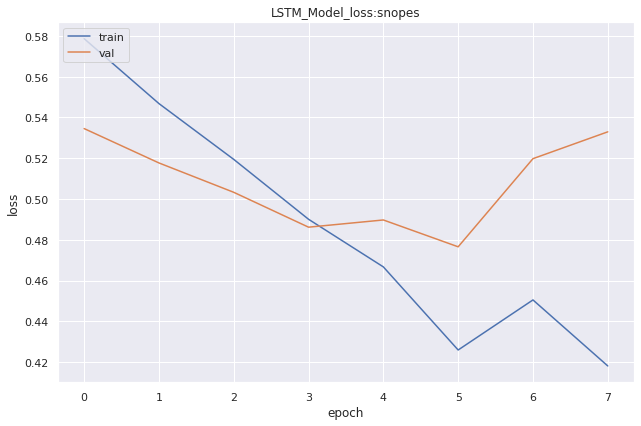

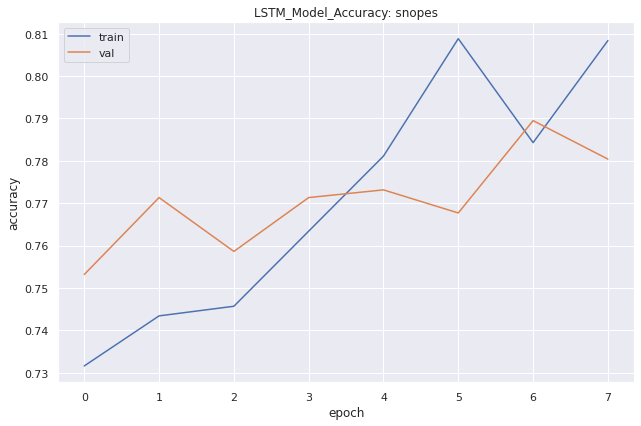

--- Starting trial: run-2
{'num_units': 128, 'dropout': 0.2, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               25728     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                          

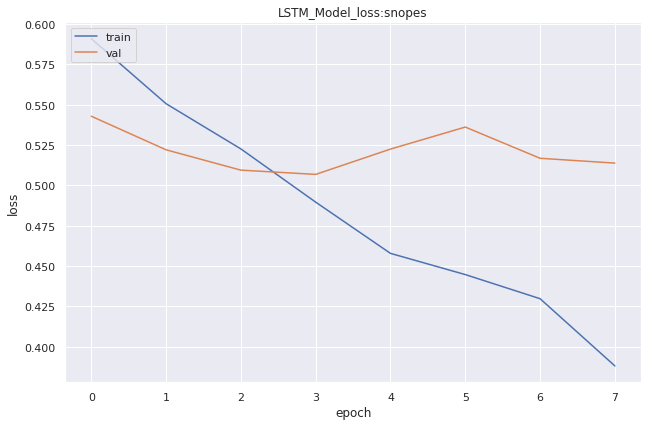

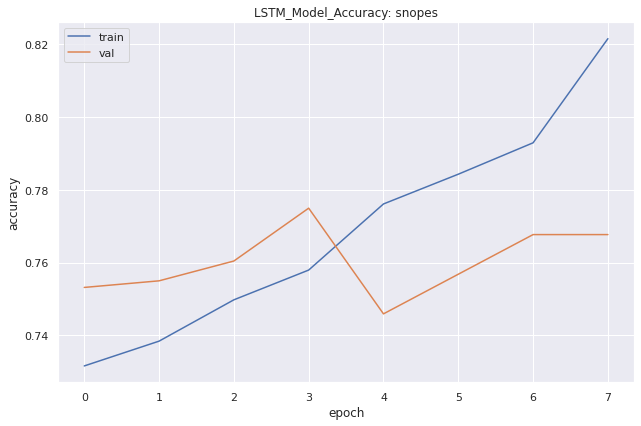

--- Starting trial: run-3
{'num_units': 128, 'dropout': 0.3, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_6 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 128)               25728     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                          

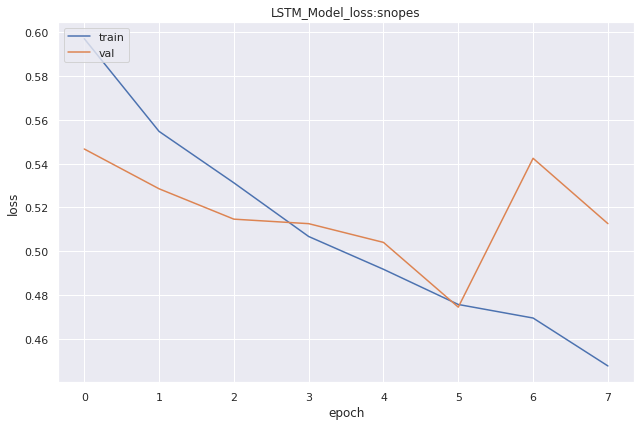

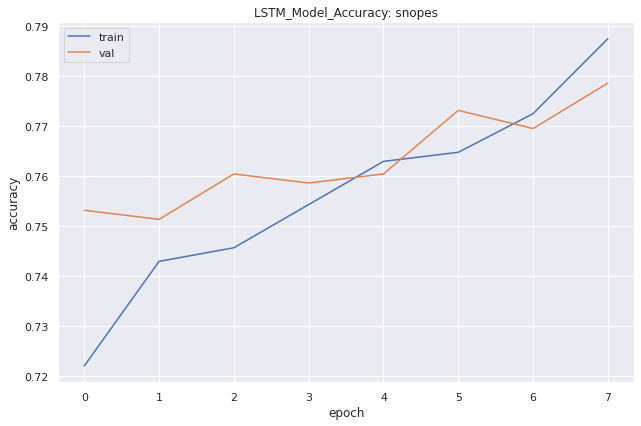

--- Starting trial: run-4
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'rmsprop', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                12864     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                        

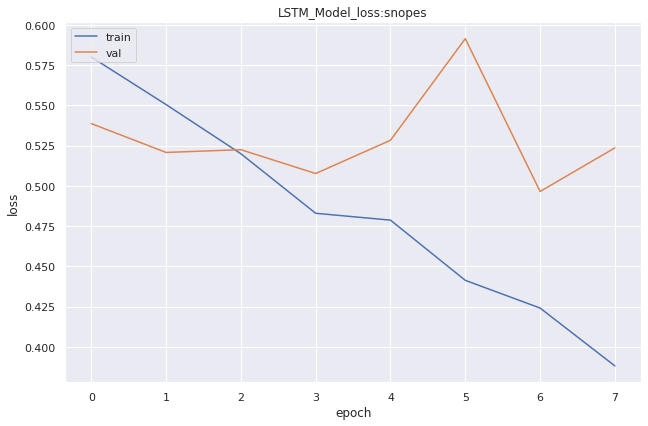

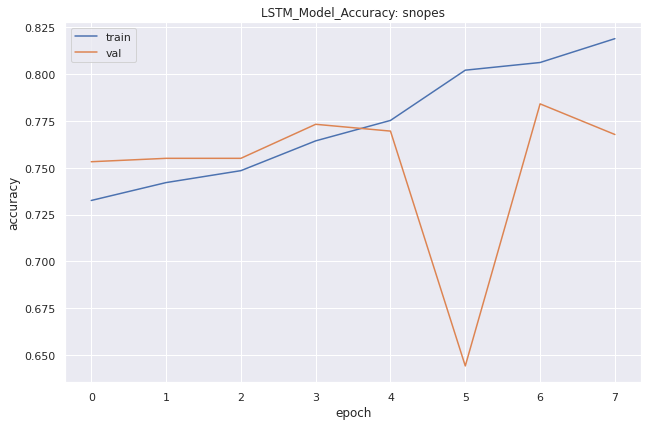

--- Starting trial: run-5
{'num_units': 64, 'dropout': 0.3, 'optimizer': 'rmsprop', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_8 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                12864     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                        

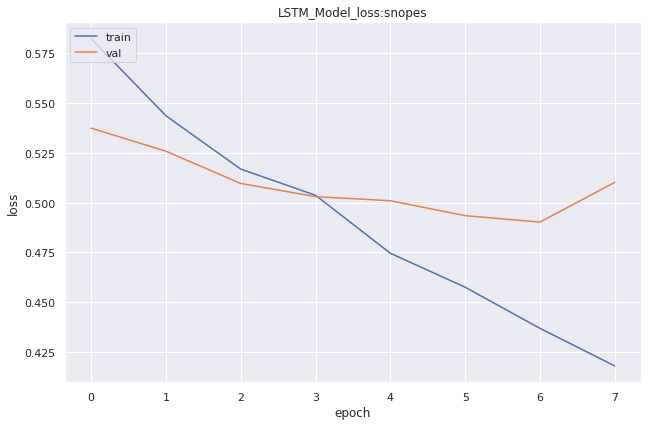

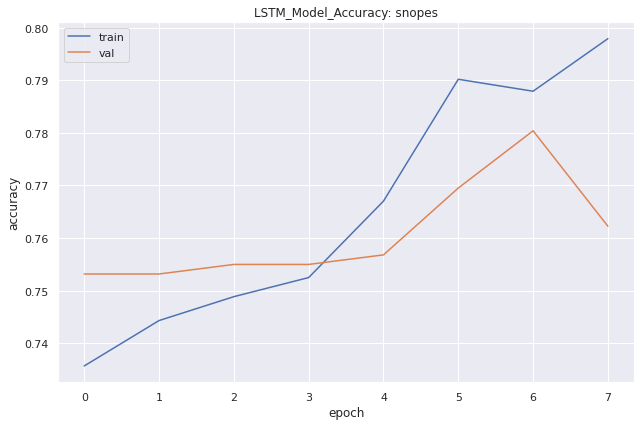

--- Starting trial: run-6
{'num_units': 128, 'dropout': 0.2, 'optimizer': 'rmsprop', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 300, 100)          4174700   
                                                                 
 bidirectional_9 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 128)               25728     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                       

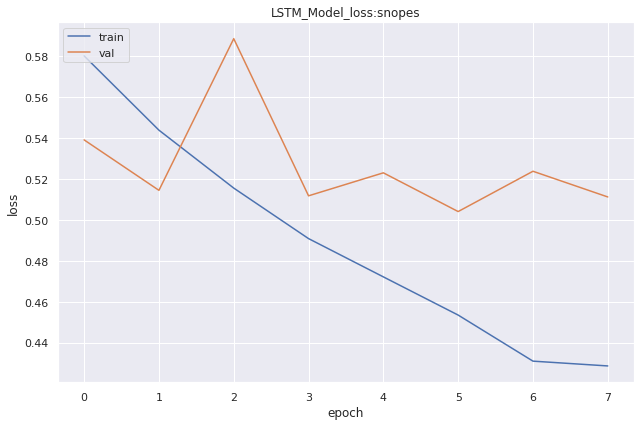

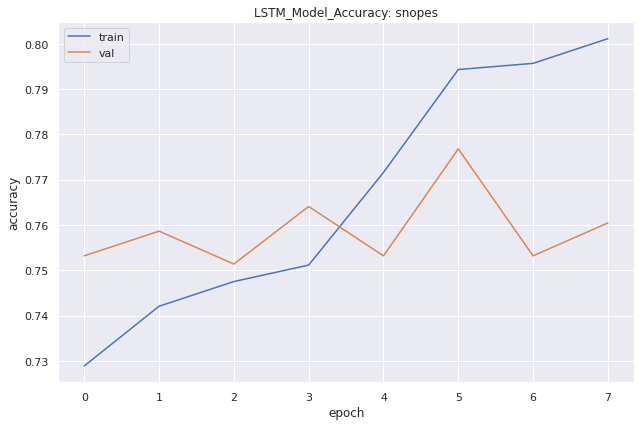

--- Starting trial: run-7
{'num_units': 128, 'dropout': 0.3, 'optimizer': 'rmsprop', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 100)          4174700   
                                                                 
 bidirectional_10 (Bidirecti  (None, 200)              160800    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 128)               25728     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                      

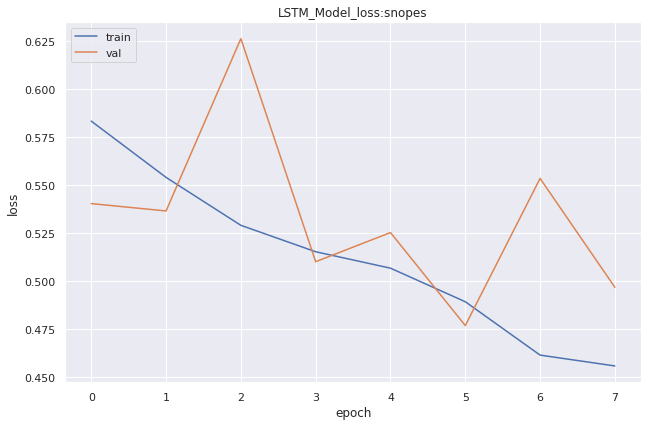

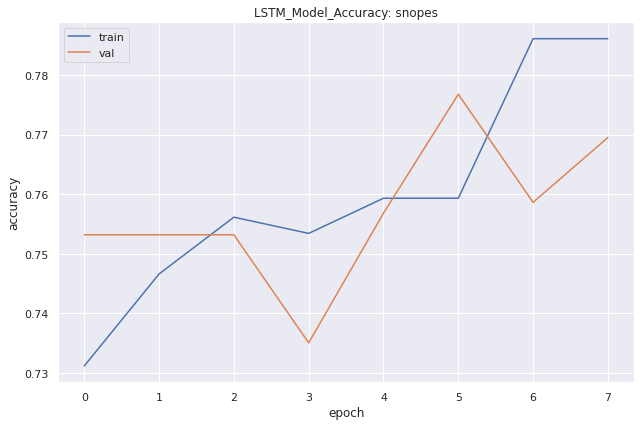

In [ ]:
# Tried to run Snopes with all Hperparameters but the running is stopped after 25 round (in Visaul studio code)'
# in Google colab it run so we can 
num_epochs = 8
dataName = 'snopes'
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';
ExecuteModel_withHyperparameter(Bin_snopesDB, dataName= dataName)
#time 581min then it is stopped

- Challange: firslty i tried to preview all curve in tensor board in Visual studio code and take a picture for the hyper paramter then i delete logs and try to use it again because i got many overlaps in learningcurve. but i could not display any curve again. I tried to solve this problem but still not solved, i used callback  also use the hands on example for hyper parameters.(tf.summary.scalar).


In [ ]:
# kill all previous logs
#import shutil
#shutil.rmtree('logs', ignore_errors=True)

# 1- Load the TensorBoard notebook extension
#%load_ext tensorboard
# to reload tesorboard
#%re_load_ext tensorboard2
#======================
# Execute Tensor board in Terminal  
# path for log_dir = "logs/fitting/"
# path for Hyperparam_dir = './logs/hparam_tuning/'

### BERT Classification:
- BERT is used in NLP, it compute vector-space representations of natural language. It is known as Bidirectional Encoder Representations from Transformers.
- It process the each token of input text in the full context of all tokens before and after by using the transformer encoder.
- 'Pre-training' and 'fine-tunung' are the two applications of BERT, which is already pre-trained on a large corpus of text, then fine-tuned for specific tasks
- The main purpose of the BERT model is to build a vector representation from the text, it only employs an encoder.


In [ ]:
!pip install tensorflow_hub
!pip install tensorflow_text

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
# Use the bert preprocesser and bert encoder from tensorflow_hub 
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") 
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
def processDF(df):
  dff = df.copy()
  fn = dff[dff['label'] == 0]
  rn = dff[dff['label'] == 1]

  sliceParameter = len(fn) if len(fn) < len(rn) else len(rn)

  ## Under-sampling the fake news to make the fake and real counts equal
  df_new = fn.sample(sliceParameter)
  df_new = df_new.merge(rn.sample(sliceParameter), how="outer")

  ## suffling the dataset
  df_new = df_new.sample(frac=1, random_state = 24).reset_index(drop=True)

  ## Removing URL from the text
  df_new['text'] = df_new['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

  ## Removing multiple occurences of punctuations
  df_new['text'] = df_new['text'].replace(r'(\W)(?=\1)', '', regex=True)

  return df_new

In [ ]:
df_pfact = processDF(Bin_politifactDB)
df_snopes = processDF(Bin_snopesDB)
df_merged = processDF(Mergeddata)

Running sample text processing and encoding

In [ ]:
sampleText = (df_merged.sample(1)['text'])
sampleText

694    "There are 7,000 kids in New Hampshire who hav...
Name: text, dtype: object

In [ ]:
## Preprocessing
explwtext = bert_preprocess(sampleText)

In [ ]:
## Preprocessing Output Keys
explwtext.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

In [ ]:
## Shape of the preprocessing output
explwtext['input_word_ids'].shape

TensorShape([1, 128])

In [ ]:
## Encoding
explwtext_encoded = bert_encoder(explwtext)

In [ ]:
## Encoding Output Keys
explwtext_encoded.keys()

dict_keys(['default', 'pooled_output', 'encoder_outputs', 'sequence_output'])

In [ ]:
## Pooled Output Shape
explwtext_encoded['pooled_output'].shape

TensorShape([1, 768])

In [ ]:
explwtext_encoded['pooled_output']

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.740773  , -0.7119462 , -0.9705003 ,  0.5415676 ,  0.82754046,
        -0.533911  , -0.2363974 ,  0.53999823, -0.88569057, -0.9999454 ,
        -0.7807887 ,  0.96414876,  0.97157365,  0.64837563,  0.516887  ,
        -0.5624568 , -0.29787156, -0.683081  ,  0.6245117 ,  0.9004832 ,
         0.6972756 ,  0.9999991 , -0.5766594 ,  0.51599973,  0.60411394,
         0.9726637 , -0.7840326 ,  0.8168691 ,  0.86411285,  0.71282077,
        -0.251913  ,  0.6236904 , -0.9902503 , -0.43442893, -0.9631079 ,
        -0.98152184,  0.68023366, -0.43276215, -0.15007317, -0.3974505 ,
        -0.7000217 ,  0.5099957 ,  0.99998575, -0.12082388,  0.75359344,
        -0.408786  , -1.        ,  0.5547165 , -0.6073467 ,  0.94557744,
         0.87068474,  0.9518415 ,  0.42783362,  0.59923506,  0.7463425 ,
        -0.8845478 ,  0.10681622,  0.40462703, -0.5740311 , -0.72492164,
        -0.68846035,  0.68429697, -0.91462773, -0.7415463 ,  0.94471973,
 

In [ ]:
customText = ["The area is concerned with Armies. It is a great pleasure.", "I am greatly surprised with this"]
exCText = bert_preprocess(customText)
exCText

{'input_mask': <tf.Tensor: shape=(2, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape

In [ ]:
exCTextEncoding = bert_encoder(exCText)

In [ ]:
exCTextEncoding['pooled_output'][0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-0.8331463 , -0.53244734, -0.95144594,  0.7921881 ,  0.72930044,
        0.00420731,  0.83143026,  0.44103673, -0.8687328 , -0.9999896 ,
       -0.65300035,  0.95351475,  0.9747428 ,  0.7010778 ,  0.9314565 ,
       -0.7091096 , -0.15771206, -0.69583637,  0.37727773, -0.10850688,
        0.71599954,  0.9999959 , -0.22883867,  0.52148205,  0.53327215,
        0.9898946 , -0.7686334 ,  0.9062218 ,  0.95468456,  0.7544818 ,
       -0.645821  ,  0.32817733, -0.9905174 , -0.30328697, -0.950435  ,
       -0.9896301 ,  0.55633277, -0.58472157, -0.03745033, -0.04545419,
       -0.91313785,  0.4559374 ,  0.9999791 , -0.06379899,  0.5186426 ,
       -0.39703527, -1.        ,  0.41722503, -0.80911905,  0.9638135 ,
        0.92451787,  0.92782384,  0.23110884,  0.52003795,  0.5406312 ,
       -0.30294907, -0.14935178,  0.22565429, -0.25899994, -0.6043801 ,
       -0.66821027,  0.43036738, -0.9003451 , -0.84724605,  0.9126402 ,
        0.814669

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf 

def ttest_split(df):
  X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(df['text'], df['label'], test_size=0.3, random_state=1000)
  return X_train_bert, X_test_bert, y_train_bert, y_test_bert

In [ ]:
input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='fakenews')

# BERT Preprocess and Encoder 
processed = bert_preprocess(input)
output = bert_encoder(processed)

part = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
part = tf.keras.layers.Dense(12,activation='relu', name='hidden')(part)
part = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(part)

model = tf.keras.Model(inputs=[input],outputs=[part])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train_pf, X_test_pf, y_train_pf, y_test_pf = ttest_split(df_pfact)
X_train_snopes, X_test_snopes, y_train_snopes, y_test_snopes = ttest_split(df_snopes)
X_train_merged, X_test_merged, y_train_merged, y_test_merged = ttest_split(df_merged)

In [ ]:
pf_fit = model.fit(X_train_pf, y_train_pf, epochs=5, validation_data=(X_test_pf, y_test_pf), validation_split=0.33, batch_size=20)

Epoch 1/5
292/292 [==============================] - 114s 384ms/step - loss: 0.6956 - accuracy: 0.5356 - val_loss: 0.6836 - val_accuracy: 0.5484
Epoch 2/5
292/292 [==============================] - 109s 372ms/step - loss: 0.6730 - accuracy: 0.5870 - val_loss: 0.6653 - val_accuracy: 0.5999
Epoch 3/5
292/292 [==============================] - 99s 341ms/step - loss: 0.6636 - accuracy: 0.5918 - val_loss: 0.6754 - val_accuracy: 0.5526
Epoch 4/5
292/292 [==============================] - 99s 339ms/step - loss: 0.6526 - accuracy: 0.6117 - val_loss: 0.6403 - val_accuracy: 0.6208
Epoch 5/5
292/292 [==============================] - 99s 340ms/step - loss: 0.6471 - accuracy: 0.6167 - val_loss: 0.6274 - val_accuracy: 0.6462


In [ ]:
snopes_fit = model.fit(X_train_snopes, y_train_snopes, epochs=5, validation_data=(X_test_snopes, y_test_snopes), validation_split=0.33, batch_size=20)

Epoch 1/5
33/33 [==============================] - 11s 336ms/step - loss: 0.6874 - accuracy: 0.5706 - val_loss: 0.6806 - val_accuracy: 0.5569
Epoch 2/5
33/33 [==============================] - 11s 341ms/step - loss: 0.6759 - accuracy: 0.5584 - val_loss: 0.6771 - val_accuracy: 0.5692
Epoch 3/5
33/33 [==============================] - 11s 344ms/step - loss: 0.6760 - accuracy: 0.5766 - val_loss: 0.6838 - val_accuracy: 0.5508
Epoch 4/5
33/33 [==============================] - 11s 346ms/step - loss: 0.6748 - accuracy: 0.5873 - val_loss: 0.6762 - val_accuracy: 0.6000
Epoch 5/5
33/33 [==============================] - 11s 344ms/step - loss: 0.6733 - accuracy: 0.5948 - val_loss: 0.6792 - val_accuracy: 0.5600


In [ ]:
merged_fit = model.fit(X_train_merged, y_train_merged, epochs=5, validation_data=(X_test_merged, y_test_merged), validation_split=0.33, batch_size=20)

Epoch 1/5
388/388 [==============================] - 133s 342ms/step - loss: 0.6245 - accuracy: 0.6524 - val_loss: 0.6078 - val_accuracy: 0.6555
Epoch 2/5
388/388 [==============================] - 172s 444ms/step - loss: 0.6198 - accuracy: 0.6597 - val_loss: 0.6124 - val_accuracy: 0.6720
Epoch 3/5
388/388 [==============================] - 132s 341ms/step - loss: 0.6127 - accuracy: 0.6655 - val_loss: 0.6032 - val_accuracy: 0.6796
Epoch 4/5
388/388 [==============================] - 171s 440ms/step - loss: 0.6100 - accuracy: 0.6723 - val_loss: 0.6087 - val_accuracy: 0.6510
Epoch 5/5
388/388 [==============================] - 132s 340ms/step - loss: 0.6088 - accuracy: 0.6681 - val_loss: 0.6044 - val_accuracy: 0.6825


In [ ]:
fn_pf = model.evaluate(X_test_pf,y_test_pf)
fn_snopes = model.evaluate(X_test_snopes,y_test_snopes)
fn_merged = model.evaluate(X_test_merged,y_test_merged)

156/156 [==============================] - 59s 377ms/step - loss: 0.5944 - accuracy: 0.6968


In [ ]:
y_predict_pf = model.predict(X_test_pf)
y_predict_snopes = model.predict(X_test_snopes)
y_predict_merged = model.predict(X_test_merged)

In [ ]:
final_predict_pf = y_predict_pf.flatten()
final_predict_snopes = y_predict_snopes.flatten()
final_predict_merged = y_predict_merged.flatten()

In [ ]:
final_predict_pf = np.where(final_predict_pf > 0.5, 1, 0)
final_predict_snopes = np.where(final_predict_snopes > 0.5, 1, 0)
final_predict_merged = np.where(final_predict_merged > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_pf = confusion_matrix(y_test_pf, final_predict_pf) 
confusion_snopes = confusion_matrix(y_test_snopes, final_predict_snopes) 
confusion_merged = confusion_matrix(y_test_merged, final_predict_merged)

Text(81.8, 0.5, 'True Politifact')

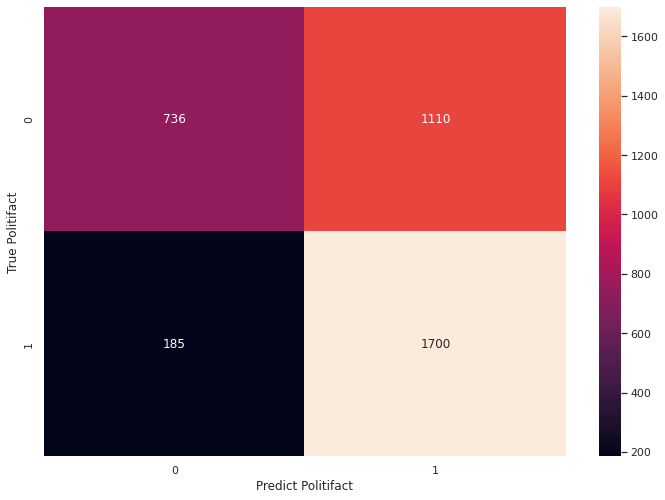

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(confusion_pf, annot=True, fmt='d')
plt.xlabel('Predict Politifact')
plt.ylabel('True Politifact')

Text(81.8, 0.5, 'True Snopes')

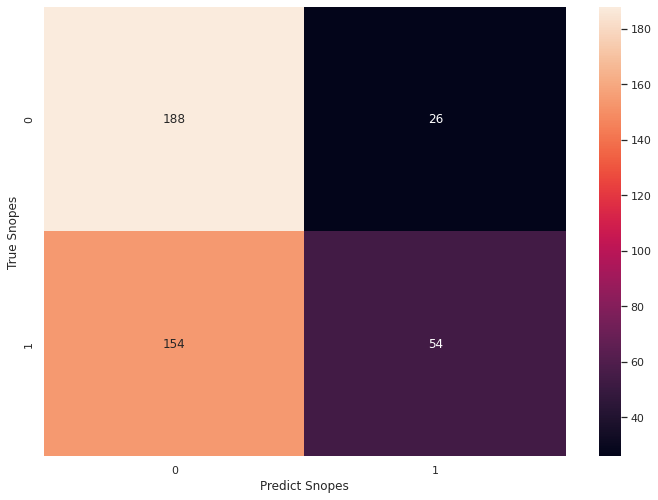

In [ ]:
sn.heatmap(confusion_snopes, annot=True, fmt='d')
plt.xlabel('Predict Snopes')
plt.ylabel('True Snopes')

Text(81.8, 0.5, 'True Merged')

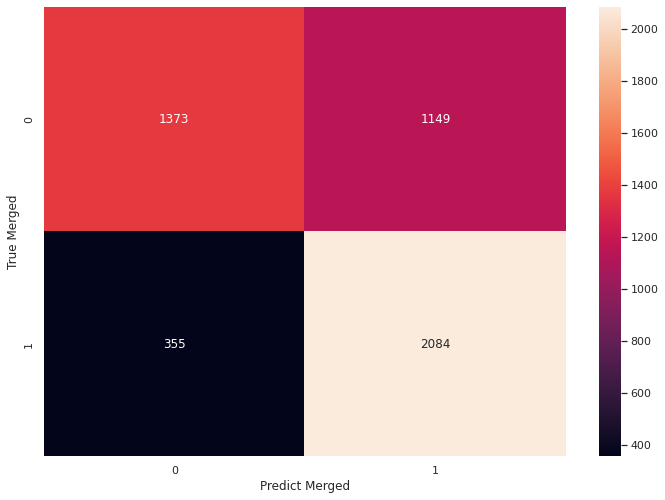

In [ ]:
sn.heatmap(confusion_merged, annot=True, fmt='d')
plt.xlabel('Predict Merged')
plt.ylabel('True Merged')

In [ ]:
print(classification_report(y_test_pf, final_predict_pf))
print(classification_report(y_test_snopes, final_predict_snopes))
print(classification_report(y_test_merged, final_predict_merged))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      1846
           1       0.60      0.90      0.72      1885

    accuracy                           0.65      3731
   macro avg       0.70      0.65      0.63      3731
weighted avg       0.70      0.65      0.63      3731

              precision    recall  f1-score   support

           0       0.55      0.88      0.68       214
           1       0.68      0.26      0.38       208

    accuracy                           0.57       422
   macro avg       0.61      0.57      0.53       422
weighted avg       0.61      0.57      0.53       422

              precision    recall  f1-score   support

           0       0.79      0.54      0.65      2522
           1       0.64      0.85      0.73      2439

    accuracy                           0.70      4961
   macro avg       0.72      0.70      0.69      4961
weighted avg       0.72      0.70      0.69      4961



In [ ]:
def plotHistory(hist, name):
  history_dict = hist.history
  acc = history_dict['accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  val_accuracy = history_dict['val_accuracy']

  epochs = range(1, len(acc) + 1)
  fig = plt.figure(figsize=(10, 6))
  fig.tight_layout()

  print("Plots for", name)
  plt.plot(acc)
  plt.plot(val_accuracy)
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  fig = plt.figure(figsize=(10, 6))

  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Plots for Politifact


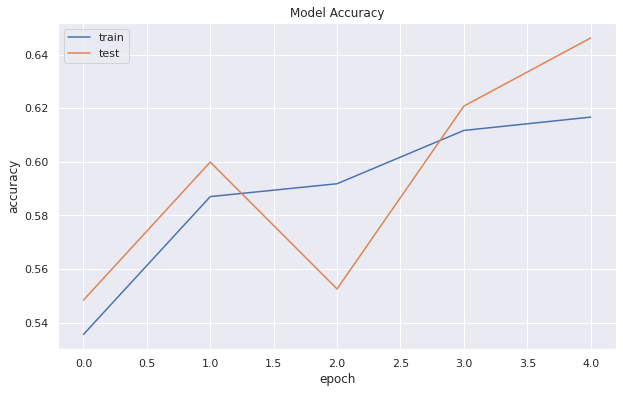

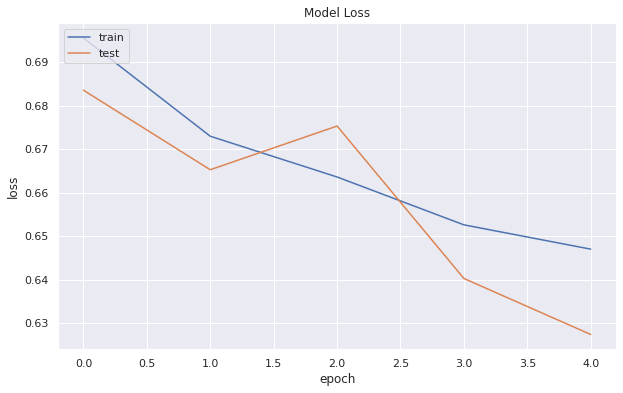

In [ ]:
plotHistory(pf_fit, "Politifact")

Plots for Snopes


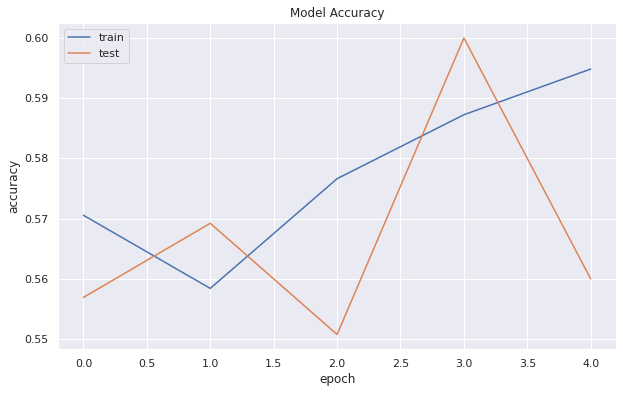

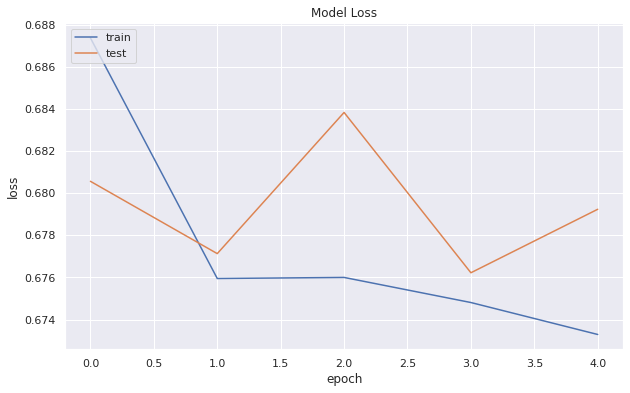

In [ ]:
plotHistory(snopes_fit, "Snopes")

Plots for Merged


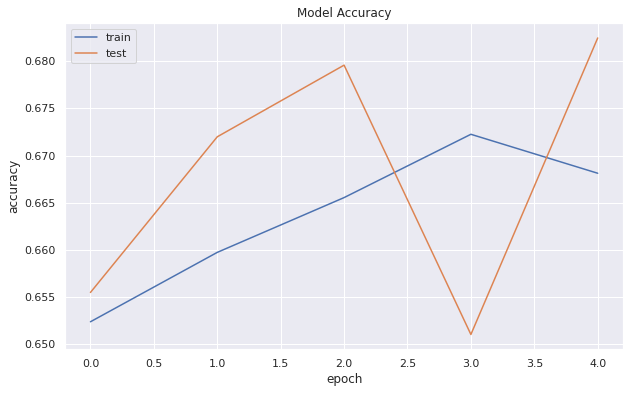

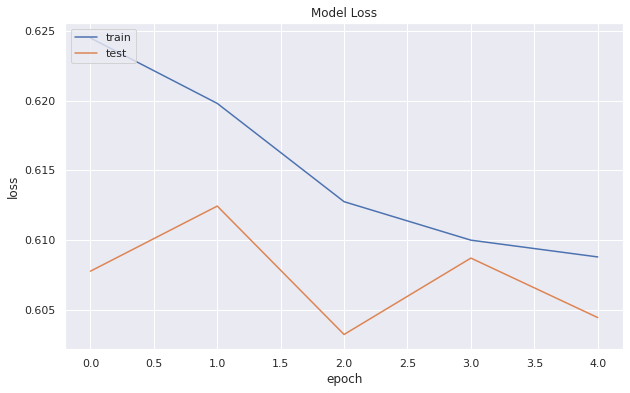

In [ ]:
plotHistory(merged_fit, "Merged")